<br><h1> <img src="https://serea2017.uniandes.edu.co/images/Logo.png" height="120" width="400" align="Center" /><br>
    
## MIIA-4203 MODELOS AVANZADOS PARA ANÁLISIS DE DATOS II
# Micro-Proyecto 1

### Profesor: Camilo Franco (c.franco31@uniandes.edu.co)

A continuación escriba los nombres de los integrantes del grupo.

                         Names                 User                Code
           - Angela Fernanda Romero Fonseca       af.romerof     201819276       
           - Juan Fernando Ortiz Serrano          jf.ortiz43     200623117
           - Elquin Huertas Ramírez               e.huertas      201920061


### Introducción
Una *start-up* agrícola quiere construir una aplicación online que conecte el campo
con la ciudad de manera directa y sin intermediarios. De esta manera, los agricultores ponen a la disposición de la empresa sus distintos productos, y la start-up se encarga de atender las necesidades de demanda distribuyendo los productos hasta los clientes finales en la ciudad.

Para optimizar la gestión logística y desarrollar esta labor de manera eficiente, los dueños de la *start-up* han visto la necesidad de diseñar e implementar un sistema de gestión y predicción que les permita planear con la debida anticipación la demanda esperada. Así podrán coordinar las actividades de producción, junto con los agricultores, y atender la demanda mientras se minimizan las pérdidas por unidades de producto no vendido o estropeado. 

Este es un reto altamente relevante para la sostenibilidad de la industria alimentaria, donde gran cantidad de las pérdidas se refieren a grupos alimenticios donde la frescura del producto es un importante criterio para el consumo. El desperdicio de los alimentos se relaciona con el sobre-pedido o el sobre-almacenamiento, lo cual puede a su vez ser consecuencia de dificultades en el pronóstico de la demanda. Este problema es aun más marcado a medida que uno sube en la cadena de producción y se aleja de los patrones de comportamiento del consumidor final. 

Por lo tanto, la start-up agrícola debe gestionar los inventarios de manera inteligente, disminuyendo la ventana de tiempo entre cosecha y consumo. Para ello, necesita desarrollar modelos de predicción de demanda que apoyen su operación, logrando la disponibilidad de los productos para atender a los clientes del día siguiente, minimizando los desperdicios de alimentos e identificando hábitos de consumo que le permita optimizar sus operaciones logísticas y de negocio.

### Enunciado
Por ello se le pide a usted, en calidad de consultor externo, desarrollar un modelo predictivo de demanda para los productos más relevantes con los que trabaja la start-up agrícola, obteniendo una predicción a nivel semanal (una semana adelante). Los datos los encuentra en el archivo DatosAgro.txt, donde se tiene la identificación del cliente, la fecha en que realizó el pedido, la magnitud del pedido (en unidades según lo especificado en el nombre del producto), su precio, y el código del producto agrícola que consta en el pedido.

*I. Introduccion con la definición del problema y la pregunta de investigación (20%)*

*II. Metodología propuesta (10%)*

*III. Resultados (20%)*

*IV. Conclusiones (25%)*

*Puede incluir referencias y anexos además de las 4 paginas.*

# I. Introducción del problema y pregunta de investigación

Nuestra *Start-up agrícola* es una empresa que nació a finales de 2016, la cual  gestiona los inventarios de productos que buscan abastecer la demanda de sus clientes, en este momento cuenta con 33 clientes, unos más desarrollados que otros, dada su participación en los ingresos de la misma; los nueve clientes principales hacen el 81% de los ingresos de la empresa.

Por su parte, la compañía agrícola ha gestionado los inventarios de 121 productos diferentes desde su origen, solo 17 productos (14% de los productos) hacen el 71% de los ingresos y de los pedidos.

Considerando que hay muchos productos que no generan la mayor participación de los ingresos y los pedidos(el 60% de los productos hacen el 10% de los pedidos), es necesario enfocar los esfuerzos analíticos y de gestión para pronósticar adecuadamente la demanda de los mismos, así como proponer la discontinuidad de algunos; toda vez que no haya demanda hacia ellos.

Dado que para la compañía cada cliente cuenta, se desea poder atender a todos los clientes actuales y abastecer total o parcialmente su demanda en función de los productos que la compañía desea enfocarse. Por ello, la pregunta a resolver es ¿Cuáles son los productos que la Start-Up debe seleccionar para enfocar sus esfuerzos y cuál es el pronóstico de pedidos que se tendrá para cada uno en la semana siguiente?

Se debe justificar la selección de los productos, así como un desarrollo analítico y metodológico que permita identificar la mejor opción de pronóstico para cada producto seleccionado.

## I. a. Visualicemos los datos

In [606]:
import pandas as pd
import numpy as np 
import seaborn as sns
import time
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt

In [607]:
#Formato para mostrar los datos
pd.options.display.float_format = '{:,.2f}'.format

In [608]:
# Importemos los datos y visualizemos la serie de tiempo
data = pd.read_csv("DatosAgro.txt", delimiter='\t', encoding="utf8")
data = data.drop('Unnamed: 6', 1)
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
0,Cliente26,18/09/2017,20,700,VER0049,Yerbabuena / 100 gramos
1,Cliente26,18/09/2017,10,1200,FRU0024,Limón Tahití / Libra
2,Cliente26,18/09/2017,4,1600,VER0041,Puerro / Libra
3,Cliente26,18/09/2017,10,1500,VER0038,Pimentón Rojo / Libra
4,Cliente26,18/09/2017,8,1100,VER0010,Zucchini Verde / Libra


In [609]:
data["Fecha"] = pd.to_datetime(data["Fecha"])

## I. b. Analicemos los datos: tipos de variables y datos faltantes 

In [610]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4712 entries, 0 to 4711
Data columns (total 6 columns):
Cliente            4708 non-null object
Fecha              4712 non-null datetime64[ns]
Pedido             4712 non-null int64
Precio             4712 non-null int64
Producto           4712 non-null object
Nombre_producto    4712 non-null object
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 221.0+ KB


*La única variable con datos faltantes es Cliente que tiene 4 datos faltantes*.

In [611]:
data.loc[:, data.isnull().any()].columns

Index(['Cliente'], dtype='object')

In [612]:
data['Cliente'].isnull().sum()

4

In [613]:
data.describe()

,Pedido,Precio
count,"4,712.00","4,712.00"
mean,4.91,"2,065.49"
std,7.49,"1,823.45"
min,1.00,200.00
25%,1.00,"1,100.00"
50%,2.00,"1,500.00"
75%,6.00,"2,000.00"
max,126.00,"20,000.00"


In [614]:
data.describe(include='all')

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
count,4708,4712,"4,712.00","4,712.00",4712,4712
unique,33,242,nan,nan,121,121
top,Cliente32,2017-07-02 00:00:00,nan,nan,FRU0046,Tomate Chonto / Libra
freq,932,97,nan,nan,355,355
first,NaN,2016-01-12 00:00:00,nan,nan,NaN,NaN
last,NaN,2017-12-09 00:00:00,nan,nan,NaN,NaN
mean,NaN,NaN,4.91,"2,065.49",NaN,NaN
std,NaN,NaN,7.49,"1,823.45",NaN,NaN
min,NaN,NaN,1.00,200.00,NaN,NaN
25%,NaN,NaN,1.00,"1,100.00",NaN,NaN


In [615]:
data.sort_values("Cliente", axis = 0, ascending = True, 
                 inplace = True, na_position ='first')
data.head(10)

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
1932,NaN,2017-06-19,40,1450,FRU0046,Tomate Chonto / Libra
1933,NaN,2017-06-19,10,2100,VER0012,Cebolla Cabezona Blanca / Libra
1934,NaN,2017-06-19,8,1700,VER0038,Pimentón Rojo / Libra
1935,NaN,2017-06-19,6,650,VER0035,Pepino Cohombro / Libra
3113,Cliente1,2017-02-16,7,700,FRU0034,Naranja Sweety / Libra
3117,Cliente1,2017-02-16,1,1400,FRU0008,Banano Criollo / Libra
3116,Cliente1,2017-02-16,1,2500,FRU0018,Guanabana / Unidad
3115,Cliente1,2017-02-16,4,1100,FRU0024,Limón Tahití / Libra
3114,Cliente1,2017-02-16,1,6000,FRU0032,Melón / Unidad
3935,Cliente1,2017-03-01,2,4000,FRU0039,Patilla Baby / Unidad


*El cliente vacío se reemplaza por Cliente33, ya que se identificó que hay hasta 33 clientes*

In [616]:
data['Cliente']=data['Cliente'].fillna('Cliente33')
data.head(10)

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
1932,Cliente33,2017-06-19,40,1450,FRU0046,Tomate Chonto / Libra
1933,Cliente33,2017-06-19,10,2100,VER0012,Cebolla Cabezona Blanca / Libra
1934,Cliente33,2017-06-19,8,1700,VER0038,Pimentón Rojo / Libra
1935,Cliente33,2017-06-19,6,650,VER0035,Pepino Cohombro / Libra
3113,Cliente1,2017-02-16,7,700,FRU0034,Naranja Sweety / Libra
3117,Cliente1,2017-02-16,1,1400,FRU0008,Banano Criollo / Libra
3116,Cliente1,2017-02-16,1,2500,FRU0018,Guanabana / Unidad
3115,Cliente1,2017-02-16,4,1100,FRU0024,Limón Tahití / Libra
3114,Cliente1,2017-02-16,1,6000,FRU0032,Melón / Unidad
3935,Cliente1,2017-03-01,2,4000,FRU0039,Patilla Baby / Unidad


In [617]:
data.isnull().sum()

Cliente            0
Fecha              0
Pedido             0
Precio             0
Producto           0
Nombre_producto    0
dtype: int64

In [618]:
data.sort_values("Cliente", axis = 0, ascending = True, 
                 inplace = True, na_position ='first')
data.head(10)

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
3523,Cliente1,2017-01-24,1,6000,FRU0032,Melón / Unidad
3938,Cliente1,2017-03-01,2,1400,FRU0023,Limón Común / Libra
2606,Cliente1,2017-03-22,1,2500,FRU0018,Guanabana / Unidad
2614,Cliente1,2017-03-22,1,1500,FRU0008,Banano Criollo / Libra
2605,Cliente1,2017-03-22,1,8000,VER0016,Champiñón / Libra
3525,Cliente1,2017-01-24,1,1400,FRU0008,Banano Criollo / Libra
3524,Cliente1,2017-01-24,1,2100,FRU0016,Fresa Pareja / Libra
3522,Cliente1,2017-01-24,7,700,FRU0034,Naranja Sweety / Libra
3937,Cliente1,2017-03-01,1,5500,FRU0032,Melón / Unidad
3931,Cliente1,2017-03-01,1,2500,VER0031,Lechuga Romana / Unidad


In [619]:
data.describe(include='all')

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto
count,4712,4712,"4,712.00","4,712.00",4712,4712
unique,33,242,nan,nan,121,121
top,Cliente32,2017-07-02 00:00:00,nan,nan,FRU0046,Tomate Chonto / Libra
freq,932,97,nan,nan,355,355
first,NaN,2016-01-12 00:00:00,nan,nan,NaN,NaN
last,NaN,2017-12-09 00:00:00,nan,nan,NaN,NaN
mean,NaN,NaN,4.91,"2,065.49",NaN,NaN
std,NaN,NaN,7.49,"1,823.45",NaN,NaN
min,NaN,NaN,1.00,200.00,NaN,NaN
25%,NaN,NaN,1.00,"1,100.00",NaN,NaN


## I. c. Veamos los clientes con mayor participación en la demanda:

In [620]:
data["PedidoPrecio"]=data["Pedido"]*data["Precio"]

In [621]:
data["SumaPedidoPrecio"]=data["PedidoPrecio"].sum(axis=0)
data["SumaPedido"]=data["Pedido"].sum(axis=0)
data.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,PedidoPrecio,SumaPedidoPrecio,SumaPedido
3523,Cliente1,2017-01-24,1,6000,FRU0032,Melón / Unidad,6000,38506320,23157
3938,Cliente1,2017-03-01,2,1400,FRU0023,Limón Común / Libra,2800,38506320,23157
2606,Cliente1,2017-03-22,1,2500,FRU0018,Guanabana / Unidad,2500,38506320,23157
2614,Cliente1,2017-03-22,1,1500,FRU0008,Banano Criollo / Libra,1500,38506320,23157
2605,Cliente1,2017-03-22,1,8000,VER0016,Champiñón / Libra,8000,38506320,23157


In [622]:
data2=data.groupby(['Cliente']).agg({'PedidoPrecio':['sum'],'SumaPedidoPrecio':['max'],'Pedido':['sum'],"SumaPedido":['max']})
data2.head(33)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido
,sum,max,sum,max
Cliente,,,,
Cliente1,129430,38506320,73,23157
Cliente10,953630,38506320,466,23157
Cliente11,309000,38506320,168,23157
Cliente12,216240,38506320,86,23157
Cliente13,631100,38506320,462,23157
Cliente14,310640,38506320,221,23157
Cliente15,241500,38506320,160,23157
Cliente16,1534270,38506320,619,23157


In [623]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Cliente1 to Cliente9
Data columns (total 4 columns):
(PedidoPrecio, sum)        33 non-null int64
(SumaPedidoPrecio, max)    33 non-null int64
(Pedido, sum)              33 non-null int64
(SumaPedido, max)          33 non-null int64
dtypes: int64(4)
memory usage: 1.3+ KB


In [624]:
data2.columns = data2.columns.droplevel(1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Cliente1 to Cliente9
Data columns (total 4 columns):
PedidoPrecio        33 non-null int64
SumaPedidoPrecio    33 non-null int64
Pedido              33 non-null int64
SumaPedido          33 non-null int64
dtypes: int64(4)
memory usage: 1.3+ KB


In [625]:
data2["PorcPedidoPrecio"]=data2["PedidoPrecio"]/data2["SumaPedidoPrecio"]*100
data2["PorcPedido"]=data2["Pedido"]/data2["SumaPedido"]*100
data2.sort_values("PorcPedidoPrecio", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
data2.head(50)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido,PorcPedidoPrecio,PorcPedido
Cliente,,,,,,
Cliente32,9762040,38506320,6680,23157,25.35,28.85
Cliente29,7536400,38506320,3188,23157,19.57,13.77
Cliente21,3949300,38506320,2485,23157,10.26,10.73
Cliente26,3684050,38506320,2935,23157,9.57,12.67
Cliente3,2011950,38506320,1105,23157,5.22,4.77
Cliente19,1830250,38506320,1277,23157,4.75,5.51
Cliente16,1534270,38506320,619,23157,3.98,2.67
Cliente10,953630,38506320,466,23157,2.48,2.01
Cliente23,866650,38506320,587,23157,2.25,2.53


In [626]:
data2=data.groupby(['Nombre_producto']).agg({'PedidoPrecio':['sum'],'SumaPedidoPrecio':['max'],'Pedido':['sum'],"SumaPedido":['max']})
data2.head(50)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido
,sum,max,sum,max
Nombre_producto,,,,
Acelga / Libra,18140,38506320,26,23157
Agraz / Libra,175600,38506320,22,23157
Aguacate Haas / Libra,600000,38506320,300,23157
Aguacate Papelillo / Libra,579900,38506320,229,23157
Ahuyama / Libra,176300,38506320,271,23157
Ajo Importado / Libra,129600,38506320,20,23157
Ajo Nacional / Libra,23700,38506320,4,23157
Ají Chirca,36000,38506320,2,23157


In [627]:
data2.columns = data2.columns.droplevel(1)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, Acelga / Libra to Zucchini Verde / Libra
Data columns (total 4 columns):
PedidoPrecio        121 non-null int64
SumaPedidoPrecio    121 non-null int64
Pedido              121 non-null int64
SumaPedido          121 non-null int64
dtypes: int64(4)
memory usage: 4.7+ KB


In [628]:
data2["PorcPedidoPrecio"]=data2["PedidoPrecio"]/data2["SumaPedidoPrecio"]*100
data2.sort_values("PorcPedidoPrecio", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
data2.tail(60)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido,PorcPedidoPrecio
Nombre_producto,,,,,
Pera Importada / Unidad,90860,38506320,71,23157,0.24
Alcachofa / Libra,85600,38506320,26,23157,0.22
Esparrago / Libra,82800,38506320,7,23157,0.22
Ají Jalapeño / Libra,78400,38506320,20,23157,0.20
Zanahoria Baby / Libra,78400,38506320,12,23157,0.20
Feijoa / Libra,76100,38506320,26,23157,0.20
Repollo Blanco / Unidad,75200,38506320,80,23157,0.20
Yuca / Libra,72980,38506320,63,23157,0.19
Plátano Verde / Libra,72200,38506320,58,23157,0.19


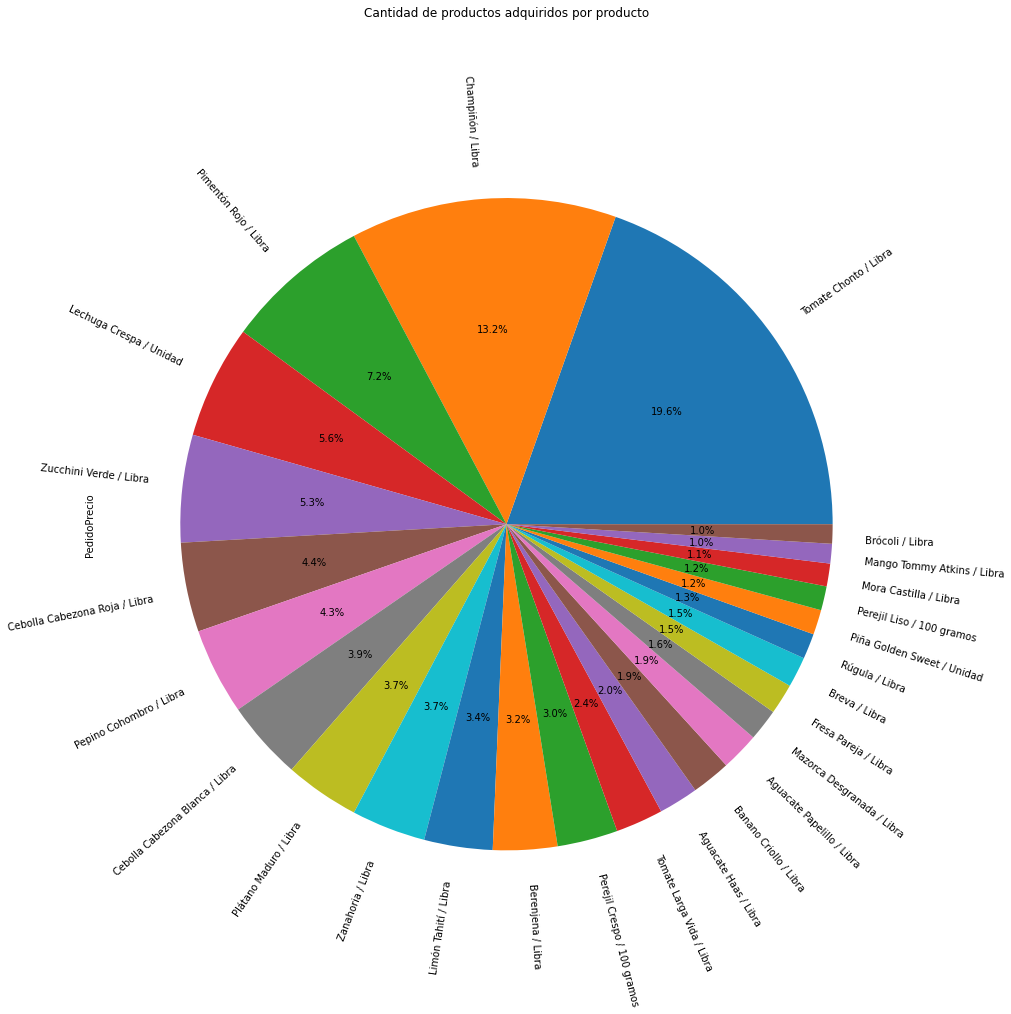

In [629]:
data3 = data2[data2['PorcPedidoPrecio']>0.69]
productos3 = data3.sort_values("PedidoPrecio", ascending= False)
productos3.plot.pie(y='PedidoPrecio', figsize=(15, 15), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

In [630]:
data2=data[(data['Nombre_producto'] =='Tomate Chonto / Libra') | (data['Nombre_producto'] =='Champiñón / Libra') | (data['Nombre_producto'] =='Pimentón Rojo / Libra') | (data['Nombre_producto'] =='Lechuga Crespa / Unidad') | (data['Nombre_producto'] =='Zucchini Verde / Libra') | (data['Nombre_producto'] =='Cebolla Cabezona Roja / Libra') | (data['Nombre_producto'] =='Pepino Cohombro / Libra') | (data['Nombre_producto'] =='Cebolla Cabezona Blanca / Libra') | (data['Nombre_producto'] =='Plátano Maduro / Libra') | (data['Nombre_producto'] =='Zanahoria / Libra') | (data['Nombre_producto'] =='Limón Tahití / Libra') | (data['Nombre_producto'] =='Berenjena / Libra') | (data['Nombre_producto'] =='Perejil Crespo / 100 gramos') | (data['Nombre_producto'] =='Tomate Larga Vida / Libra') | (data['Nombre_producto'] =='Aguacate Haas / Libra') | (data['Nombre_producto'] =='Banano Criollo / Libra') | (data['Nombre_producto'] =='Aguacate Papelillo / Libra')]

In [631]:
data2.head()

,Cliente,Fecha,Pedido,Precio,Producto,Nombre_producto,PedidoPrecio,SumaPedidoPrecio,SumaPedido
2614,Cliente1,2017-03-22,1,1500,FRU0008,Banano Criollo / Libra,1500,38506320,23157
2605,Cliente1,2017-03-22,1,8000,VER0016,Champiñón / Libra,8000,38506320,23157
3525,Cliente1,2017-01-24,1,1400,FRU0008,Banano Criollo / Libra,1400,38506320,23157
3520,Cliente1,2017-01-24,7,1100,FRU0048,Tomate Larga Vida / Libra,7700,38506320,23157
3932,Cliente1,2017-03-01,1,1100,FRU0048,Tomate Larga Vida / Libra,1100,38506320,23157


In [632]:
data3=data2.groupby(['Cliente']).agg({'PedidoPrecio':['sum'],'SumaPedidoPrecio':['max'], 'Pedido':['sum'],"SumaPedido":['max']})
data3.head(33)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido
,sum,max,sum,max
Cliente,,,,
Cliente1,34300,38506320,23,23157
Cliente10,219960,38506320,114,23157
Cliente11,46000,38506320,41,23157
Cliente12,32600,38506320,15,23157
Cliente13,317850,38506320,218,23157
Cliente14,54710,38506320,38,23157
Cliente15,66300,38506320,45,23157
Cliente16,446850,38506320,211,23157


In [633]:
data3.columns = data3.columns.droplevel(1)
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, Cliente1 to Cliente9
Data columns (total 4 columns):
PedidoPrecio        33 non-null int64
SumaPedidoPrecio    33 non-null int64
Pedido              33 non-null int64
SumaPedido          33 non-null int64
dtypes: int64(4)
memory usage: 1.3+ KB


In [634]:
data3["PorcPedidoPrecio"]=data3["PedidoPrecio"]/data3["SumaPedidoPrecio"]*100
data3["PorcPedido"]=data3["Pedido"]/data3["SumaPedido"]*100
data3.sort_values("PorcPedidoPrecio", axis = 0, ascending = False, 
                 inplace = True, na_position ='first')
data3.head(50)

,PedidoPrecio,SumaPedidoPrecio,Pedido,SumaPedido,PorcPedidoPrecio,PorcPedido
Cliente,,,,,,
Cliente32,8938650,38506320,5892,23157,23.21,25.44
Cliente29,6570150,38506320,2753,23157,17.06,11.89
Cliente26,3456400,38506320,2753,23157,8.98,11.89
Cliente21,2343300,38506320,1503,23157,6.09,6.49
Cliente3,1170700,38506320,627,23157,3.04,2.71
Cliente19,922050,38506320,630,23157,2.39,2.72
Cliente23,824150,38506320,562,23157,2.14,2.43
Cliente16,446850,38506320,211,23157,1.16,0.91
Cliente24,384500,38506320,187,23157,1.00,0.81


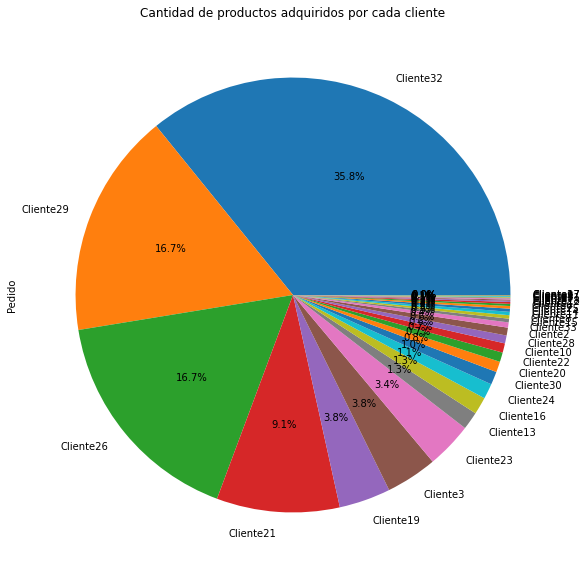

In [635]:
cliente = pd.DataFrame(data2[data2['Pedido'] > 0].groupby(data2["Cliente"]).sum())
cliente2 = cliente[cliente['Pedido']>0]
cliente3 = cliente2.sort_values("Pedido", ascending= False)
cliente3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%')
plt.title("Cantidad de productos adquiridos por cada cliente")
plt.show()


## I. d. Veamos los productos con más volumen de pedido:

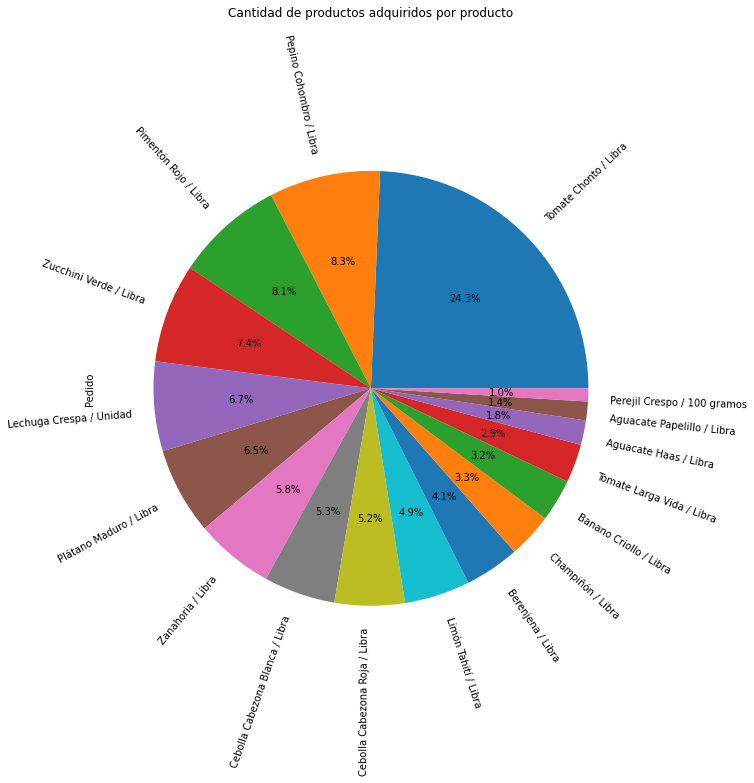

In [636]:
productos = pd.DataFrame(data2["Pedido"].groupby(data2["Nombre_producto"]).sum())
productos2 = productos[productos['Pedido']>0]
productos3 = productos2.sort_values("Pedido", ascending= False)
productos3.plot.pie(y='Pedido', figsize=(10, 10), legend=False, autopct='%1.1f%%', rotatelabels=True)
plt.title("Cantidad de productos adquiridos por producto", pad=100)
plt.show()

- Con los 17 productos seleccionados se acumula el 70% de los ingresos de la Start-up y el 71% de los pedidos que recibe, con éstos productos se logra incluir al 100% de los clientes, haciendo que a los principales (el 75% de los que más ingresos generan), se les supla en un 72.5%, en promedio, los pedidos que demandan.

In [637]:
data3 = pd.DataFrame(data2.groupby(['Fecha','Nombre_producto'])['Pedido'].sum())

In [638]:
data3.head()

Pedido
Fecha      Nombre_producto                        
2016-01-12 Berenjena / Libra                     2
           Cebolla Cabezona Blanca / Libra       3
           Champiñón / Libra                     1
           Pepino Cohombro / Libra               1
           Tomate Chonto / Libra                 3

In [639]:
data4 = data3.unstack()

In [640]:
# data3.columns = data3.columns.droplevel()
# data3

In [641]:
data4.head(10)

Pedido                             \
Nombre_producto Aguacate Haas / Libra Aguacate Papelillo / Libra   
Fecha                                                              
2016-01-12                        nan                        nan   
2016-02-12                        nan                       5.00   
2016-04-12                        nan                        nan   
2016-05-12                      11.00                        nan   
2016-06-12                        nan                       1.00   
2016-07-12                        nan                        nan   
2016-08-12                        nan                        nan   
2016-09-12                        nan                       5.00   
2016-11-12                        nan                        nan   
2016-11-17                       5.00                        nan   

                                                          \
Nombre_producto Banano Criollo / Libra Berenjena / Libra   
Fecha                                                      
2016-01-12                         nan              2.00   
2016-02-12                        8.00              8.00   
2016-04-12                        2.00              6.00   
2016-05-12                         nan              3.00   
2016-06-12                        3.00              3.00   
2016-07-12                         nan             10.00   
2016-08-12                         nan               nan   
2016-09-12                         nan              5.00   
2016-11-12                         nan              8.00   
2016-11-17                         nan               nan   

                                                                               \
Nombre_producto Cebolla Cabezona Blanca / Libra Cebolla Cabezona Roja / Libra   
Fecha                                                                           
2016-01-12                                 3.00                           nan   
2016-02-12                                 1.00                          9.00   
2016-04-12                                  nan                          1.00   
2016-05-12                                  nan                          5.00   
2016-06-12                                  nan                           nan   
2016-07-12                                  nan                          9.00   
2016-08-12                                 1.00                           nan   
2016-09-12                                 2.00                          6.00   
2016-11-12                                  nan                          2.00   
2016-11-17                                  nan                           nan   

                                                           \
Nombre_producto Champiñón / Libra Lechuga Crespa / Unidad   
Fecha                                                       
2016-01-12                   1.00                     nan   
2016-02-12                   3.00                    2.00   
2016-04-12                   1.00                     nan   
2016-05-12                    nan                     nan   
2016-06-12                   1.00                     nan   
2016-07-12                    nan                     nan   
2016-08-12                   1.00                    2.00   
2016-09-12                    nan                    2.00   
2016-11-12                    nan                     nan   
2016-11-17                    nan                     nan   

                                                              \
Nombre_producto Limón Tahití / Libra Pepino Cohombro / Libra   
Fecha                                                          
2016-01-12                       nan                    1.00   
2016-02-12                      6.00                    9.00   
2016-04-12                       nan                   18.00   
2016-05-12                      6.00                    4.00   
2016-06-12                      2.00                    6.00   
2016-

In [642]:
data4=data4.fillna('0')

In [643]:
data4.columns = data4.columns.droplevel()

In [644]:
data4 = data4.sort_values(by='Fecha')

In [645]:
data4.shape

(239, 17)

In [646]:
data4.head(15)

Nombre_producto,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,
2016-01-12,0,0,0,2.00,3.00,0,1.00,0,0,1.00,0,0,0,3.00,0,2.00,1.00
2016-02-12,0,5.00,8.00,8.00,1.00,9.00,3.00,2.00,6.00,9.00,1.00,9.00,0,18.00,0,4.00,15.00
2016-04-12,0,0,2.00,6.00,0,1.00,1.00,0,0,18.00,0,18.00,0,11.00,0,1.00,10.00
2016-05-12,11.00,0,0,3.00,0,5.00,0,0,6.00,4.00,0,7.00,0,8.00,0,0,10.00
2016-06-12,0,1.00,3.00,3.00,0,0,1.00,0,2.00,6.00,0,0,0,25.00,0,2.00,0
2016-07-12,0,0,0,10.00,0,9.00,0,0,2.00,10.00,3.00,7.00,0,26.00,0,0,13.00
2016-08-12,0,0,0,0,1.00,0,1.00,2.00,1.00,0,0,0,0,0,2.00,6.00,0
2016-09-12,0,5.00,0,5.00,2.00,6.00,0,2.00,21.00,9.00,0,1.00,0,27.00,0,4.00,11.00
2016-11-12,0,0,0,8.00,0,2.00,0,0,5.00,13.00,1.00,8.00,0,0,0,0,16.00


In [647]:
data4.tail(15)

Nombre_producto,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,
2017-11-01,0,0,0,4.00,0,0,1.00,0,0,4.00,0,8.00,1.00,13.00,0,1.00,0
2017-11-02,0,0,0,0,0,0,2.00,7.00,0,1.00,0,0,0,8.00,0,0,0
2017-11-04,0,0,0,6.00,0,10.00,0,0,4.00,8.00,0,20.00,0,32.00,0,0,0
2017-11-05,0,0,0,0,31.00,0,5.00,6.00,24.00,1.00,0,5.00,13.00,46.00,0,10.00,0
2017-11-06,0,0,0,0,1.00,0,3.00,7.00,1.00,0,0,0,0,8.00,0,0,0
2017-11-07,0,0,0,0,0,0,4.00,8.00,0,2.00,0,0,0,10.00,0,0,0
2017-11-08,14.00,0,5.00,0,0,22.00,17.00,0,14.00,0,0,3.00,5.00,27.00,0,0,4.00
2017-11-09,0,5.00,11.00,5.00,0,14.00,4.00,3.00,4.00,2.00,0,27.00,42.00,28.00,9.00,18.00,12.00
2017-12-01,0,0,0,14.00,0,4.00,0,0,5.00,18.00,2.00,34.00,0,28.00,0,0,22.00


In [648]:
print(len(data4['2016']))
print(len(data4['2017']))

36
203


In [649]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2016-01-12 to 2017-12-09
Data columns (total 17 columns):
Aguacate Haas / Libra              239 non-null object
Aguacate Papelillo / Libra         239 non-null object
Banano Criollo / Libra             239 non-null object
Berenjena / Libra                  239 non-null object
Cebolla Cabezona Blanca / Libra    239 non-null object
Cebolla Cabezona Roja / Libra      239 non-null object
Champiñón / Libra                  239 non-null object
Lechuga Crespa / Unidad            239 non-null object
Limón Tahití / Libra               239 non-null object
Pepino Cohombro / Libra            239 non-null object
Perejil Crespo / 100 gramos        239 non-null object
Pimentón Rojo / Libra              239 non-null object
Plátano Maduro / Libra             239 non-null object
Tomate Chonto / Libra              239 non-null object
Tomate Larga Vida / Libra          239 non-null object
Zanahoria / Libra                  239 non-null obj

In [650]:
data4

Nombre_producto,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Fecha,,,,,,,,,,,,,,,,,
2016-01-12,0,0,0,2.00,3.00,0,1.00,0,0,1.00,0,0,0,3.00,0,2.00,1.00
2016-02-12,0,5.00,8.00,8.00,1.00,9.00,3.00,2.00,6.00,9.00,1.00,9.00,0,18.00,0,4.00,15.00
2016-04-12,0,0,2.00,6.00,0,1.00,1.00,0,0,18.00,0,18.00,0,11.00,0,1.00,10.00
2016-05-12,11.00,0,0,3.00,0,5.00,0,0,6.00,4.00,0,7.00,0,8.00,0,0,10.00
2016-06-12,0,1.00,3.00,3.00,0,0,1.00,0,2.00,6.00,0,0,0,25.00,0,2.00,0
2016-07-12,0,0,0,10.00,0,9.00,0,0,2.00,10.00,3.00,7.00,0,26.00,0,0,13.00
2016-08-12,0,0,0,0,1.00,0,1.00,2.00,1.00,0,0,0,0,0,2.00,6.00,0
2016-09-12,0,5.00,0,5.00,2.00,6.00,0,2.00,21.00,9.00,0,1.00,0,27.00,0,4.00,11.00
2016-11-12,0,0,0,8.00,0,2.00,0,0,5.00,13.00,1.00,8.00,0,0,0,0,16.00


In [651]:
data4['Tomate Chonto / Libra'] =pd.to_numeric(data4['Tomate Chonto / Libra'],downcast='integer',errors='ignore')
data4['Champiñón / Libra'] =pd.to_numeric(data4['Champiñón / Libra'],downcast='integer',errors='ignore')
data4['Pimentón Rojo / Libra'] =pd.to_numeric(data4['Pimentón Rojo / Libra'],downcast='integer',errors='ignore')
data4['Lechuga Crespa / Unidad'] =pd.to_numeric(data4['Lechuga Crespa / Unidad'],downcast='integer',errors='ignore')
data4['Zucchini Verde / Libra'] =pd.to_numeric(data4['Zucchini Verde / Libra'],downcast='integer',errors='ignore')
data4['Cebolla Cabezona Roja / Libra'] =pd.to_numeric(data4['Cebolla Cabezona Roja / Libra'],downcast='integer',errors='ignore')
data4['Pepino Cohombro / Libra'] =pd.to_numeric(data4['Pepino Cohombro / Libra'],downcast='integer',errors='ignore')
data4['Cebolla Cabezona Blanca / Libra'] =pd.to_numeric(data4['Cebolla Cabezona Blanca / Libra'],downcast='integer',errors='ignore')
data4['Plátano Maduro / Libra'] =pd.to_numeric(data4['Plátano Maduro / Libra'],downcast='integer',errors='ignore')
data4['Zanahoria / Libra'] =pd.to_numeric(data4['Zanahoria / Libra'],downcast='integer',errors='ignore')
data4['Limón Tahití / Libra'] =pd.to_numeric(data4['Limón Tahití / Libra'],downcast='integer',errors='ignore')
data4['Berenjena / Libra'] =pd.to_numeric(data4['Berenjena / Libra'],downcast='integer',errors='ignore')
data4['Perejil Crespo / 100 gramos'] =pd.to_numeric(data4['Perejil Crespo / 100 gramos'],downcast='integer',errors='ignore')
data4['Tomate Larga Vida / Libra'] =pd.to_numeric(data4['Tomate Larga Vida / Libra'],downcast='integer',errors='ignore')
data4['Aguacate Haas / Libra'] =pd.to_numeric(data4['Aguacate Haas / Libra'],downcast='integer',errors='ignore')
data4['Banano Criollo / Libra'] =pd.to_numeric(data4['Banano Criollo / Libra'],downcast='integer',errors='ignore')
data4['Aguacate Papelillo / Libra'] =pd.to_numeric(data4['Aguacate Papelillo / Libra'],downcast='integer',errors='ignore')

In [652]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239 entries, 2016-01-12 to 2017-12-09
Data columns (total 17 columns):
Aguacate Haas / Libra              239 non-null int8
Aguacate Papelillo / Libra         239 non-null int8
Banano Criollo / Libra             239 non-null int8
Berenjena / Libra                  239 non-null int8
Cebolla Cabezona Blanca / Libra    239 non-null int8
Cebolla Cabezona Roja / Libra      239 non-null int8
Champiñón / Libra                  239 non-null int8
Lechuga Crespa / Unidad            239 non-null int8
Limón Tahití / Libra               239 non-null int8
Pepino Cohombro / Libra            239 non-null int8
Perejil Crespo / 100 gramos        239 non-null int8
Pimentón Rojo / Libra              239 non-null int8
Plátano Maduro / Libra             239 non-null int8
Tomate Chonto / Libra              239 non-null int16
Tomate Larga Vida / Libra          239 non-null int8
Zanahoria / Libra                  239 non-null int8
Zucchini Verde / Libra     

In [653]:
data4.describe()

Nombre_producto,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
count,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00,239.00
mean,1.26,0.96,2.17,2.80,3.66,3.59,2.29,4.58,3.36,5.69,0.67,5.54,4.45,16.74,1.97,4.02,5.07
std,9.83,1.93,5.30,4.23,12.74,5.82,2.34,5.40,5.70,8.37,1.86,8.20,14.88,16.72,4.82,9.01,6.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,2.00,5.00,0.00,2.00,0.00,1.00,0.00,11.00,0.00,0.00,2.00
75%,0.00,0.50,2.00,5.00,1.00,6.00,3.00,7.00,4.00,7.00,0.00,8.00,0.00,21.00,0.00,4.00,10.00
max,113.00,12.00,42.00,22.00,70.00,40.00,17.00,48.00,29.00,46.00,15.00,45.00,100.00,145.00,25.00,59.00,30.00


Text(0.5, 0, 'Day')

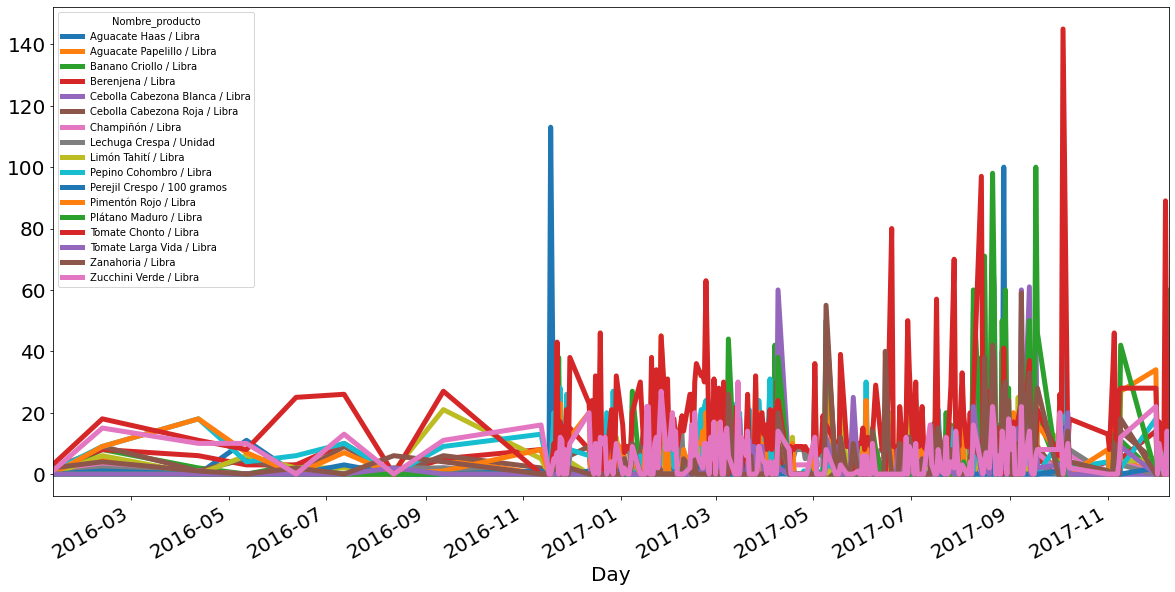

In [654]:
data4.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Day', fontsize=20)

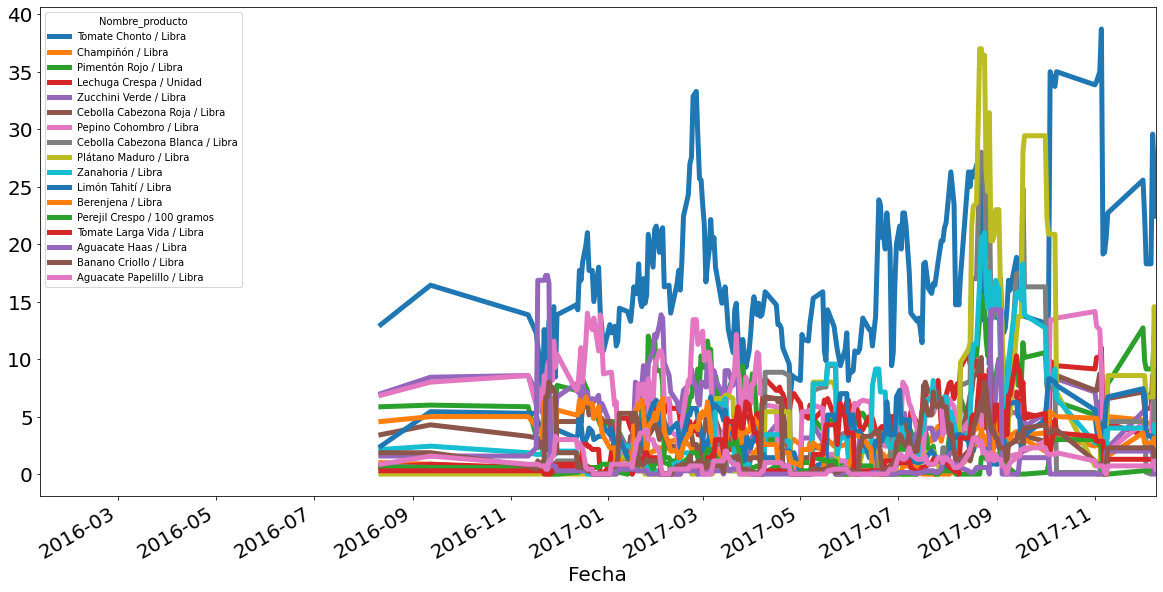

In [655]:
items = data4[['Tomate Chonto / Libra', 'Champiñón / Libra', 'Pimentón Rojo / Libra', 'Lechuga Crespa / Unidad', 
               'Zucchini Verde / Libra', 'Cebolla Cabezona Roja / Libra', 'Pepino Cohombro / Libra', 
               'Cebolla Cabezona Blanca / Libra', 'Plátano Maduro / Libra', 'Zanahoria / Libra', 'Limón Tahití / Libra', 
               'Berenjena / Libra', 'Perejil Crespo / 100 gramos', 'Tomate Larga Vida / Libra', 'Aguacate Haas / Libra', 
               'Banano Criollo / Libra', 'Aguacate Papelillo / Libra',]]
items.rolling(7).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Fecha', fontsize=20);

In [656]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf

In [657]:
#Matriz de Correlacion
data4.corr()

Nombre_producto,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
Nombre_producto,,,,,,,,,,,,,,,,,
Aguacate Haas / Libra,1.00,0.04,0.02,-0.04,-0.03,0.05,0.17,0.06,-0.03,-0.05,-0.04,-0.06,0.02,0.01,-0.03,0.08,-0.01
Aguacate Papelillo / Libra,0.04,1.00,0.31,0.03,0.12,0.14,0.20,0.03,0.11,-0.07,-0.11,0.09,0.13,0.04,0.18,0.25,0.22
Banano Criollo / Libra,0.02,0.31,1.00,-0.10,0.03,0.13,0.13,-0.04,0.04,-0.12,-0.10,0.04,0.13,0.02,0.11,0.24,0.11
Berenjena / Libra,-0.04,0.03,-0.10,1.00,0.07,0.15,-0.20,-0.16,0.15,0.51,0.25,0.50,0.06,0.24,0.02,0.03,0.54
Cebolla Cabezona Blanca / Libra,-0.03,0.12,0.03,0.07,1.00,-0.03,0.20,0.08,0.02,-0.11,0.17,0.50,0.86,0.05,0.61,0.73,0.29
Cebolla Cabezona Roja / Libra,0.05,0.14,0.13,0.15,-0.03,1.00,0.20,0.31,0.08,0.39,0.25,0.12,0.03,0.65,-0.02,0.04,0.17
Champiñón / Libra,0.17,0.20,0.13,-0.20,0.20,0.20,1.00,0.61,-0.02,-0.15,-0.08,-0.01,0.20,0.15,0.22,0.24,-0.02
Lechuga Crespa / Unidad,0.06,0.03,-0.04,-0.16,0.08,0.31,0.61,1.00,-0.11,0.07,0.17,-0.11,0.05,0.41,0.09,0.01,-0.12
Limón Tahití / Libra,-0.03,0.11,0.04,0.15,0.02,0.08,-0.02,-0.11,1.00,0.13,-0.02,0.06,-0.04,0.23,0.08,0.07,0.15


# II. Metodología Propuesta

Con base en los 17 productos, se propone analizar las series temporales de cada uno de ellos, tomando la información diaria para predecir la demanda de los pedidos que se dará de cada uno de ellos en la semana siguiente.

Se analizarán los resultados en función de dos metodologías:

# **Describir cada metodología**
- Redes Neuronales simples con perceptrón
- Análisis de Series Temporales mediante Facebook Prohet



La medida de comparación del desempeño de los pronósticos será el *Error Cuadrático Medio (MSE)* que nos indica qué tanto falla el modelo en sus pronósticos utilizando un subconjunto de los datos observados como muestra de validación y el restante subconjunto como muestra de entrenamiento.

## b. A continuación la implementación de las metodología propuesta para construir los modelo:

In [658]:
Tomate_Chonto =data4['Tomate Chonto / Libra']
Champinon =data4['Champiñón / Libra']
Pimenton_Rojo =data4['Pimentón Rojo / Libra']
Lechuga_Crespa =data4['Lechuga Crespa / Unidad']
Zucchini_Verde =data4['Zucchini Verde / Libra']
Cebolla_Cabezona_Roja =data4['Cebolla Cabezona Roja / Libra']
Pepino_Cohombro =data4['Pepino Cohombro / Libra']
Cebolla_Cabezona_Blanca =data4['Cebolla Cabezona Blanca / Libra']
Platano_Maduro =data4['Plátano Maduro / Libra']
Zanahoria =data4['Zanahoria / Libra']
Limon_Tahití =data4['Limón Tahití / Libra']
Berenjena =data4['Berenjena / Libra']
Perejil_Crespo =data4['Perejil Crespo / 100 gramos']
Tomate_Larga_Vida =data4['Tomate Larga Vida / Libra']
Aguacate_Haas =data4['Aguacate Haas / Libra']
Banano_Criollo =data4['Banano Criollo / Libra']
Aguacate_Papelillo =data4['Aguacate Papelillo / Libra']

# III. Resultados

## III. a. Predicción mediante Redes Neuronales 


 Referencia: https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/

In [659]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

- Tomate Chonto

In [660]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Tomate_Chonto.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.96,-0.75,-0.85,-0.89,-0.66,-0.64,-1.00,-0.63
8,-0.75,-0.85,-0.89,-0.66,-0.64,-1.00,-0.63,-1.00
9,-0.85,-0.89,-0.66,-0.64,-1.00,-0.63,-1.00,-1.00
10,-0.89,-0.66,-0.64,-1.00,-0.63,-1.00,-1.00,-1.00
11,-0.66,-0.64,-1.00,-0.63,-1.00,-1.00,-1.00,-0.86


In [661]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [662]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [663]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_36 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.9339 - mse: 0.9846 - val_loss: 0.6027 - val_mse: 0.4815
Epoch 2/80
218/218 [==============================] - 0s 237us/step - loss: 0.4747 - mse: 0.3093 - val_loss: 0.3739 - val_mse: 0.2369
Epoch 3/80
218/218 [==============================] - 0s 233us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 188us/step - loss: 0.1408 - mse: 0.0585 - val_loss: 0.1966 - val_mse: 0.1078
Epoch 57/80
218/218 [==============================] - 0s 197us/step - loss: 0.1410 - mse: 0.0584 - val_loss: 0.1964 - val_mse: 0.1076
Epoch 58/80
218/218 [==============================] - 0s 215us/step - loss: 0.1407 - mse: 0.0593 - val_loss: 0.1967 - val_mse: 0.1079
Epoch 59/80
218/218 [==============================] - 0s 210us/step - loss: 0.1403 - mse: 0.0587 - val_loss: 0.1960 - val_mse: 0.1065
Epoch 60/80
218/218 [==============================] - 0s 206us/step - loss: 0.1404 - mse: 0.0577 - val_loss: 0.1957 - val_mse: 0.1063
Epoch 61/80
218/218 [==============================] - 0s 201us/step - loss: 0.1401 - mse: 0.0589 - val_loss: 0.1955 - val_mse: 0.1066
Epoch 62/80
218/218 [==============================] - 0s 206us/step - loss: 0.1403 - mse: 0.0572 - val_loss: 0.1952 - val_mse: 0.1056
Epoch 63/80
218/218 [==============================] - 

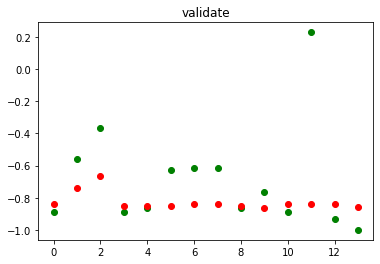

In [664]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [665]:
ultimosDias = Tomate_Chonto['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01    13
2017-11-02     8
2017-11-04    32
2017-11-05    46
2017-11-06     8
2017-11-07    10
2017-11-08    27
2017-11-09    28
2017-12-01    28
2017-12-02    10
2017-12-03    17
2017-12-06     8
2017-12-07    89
2017-12-08     5
2017-12-09     0
Name: Tomate Chonto / Libra, dtype: int16

In [666]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.71,-0.82,-0.28,0.03,-0.82,-0.78,-0.39
8,-0.82,-0.28,0.03,-0.82,-0.78,-0.39,-0.37
9,-0.28,0.03,-0.82,-0.78,-0.39,-0.37,-0.37
10,0.03,-0.82,-0.78,-0.39,-0.37,-0.37,-0.78
11,-0.82,-0.78,-0.39,-0.37,-0.37,-0.78,-0.62
12,-0.78,-0.39,-0.37,-0.37,-0.78,-0.62,-0.82
13,-0.39,-0.37,-0.37,-0.78,-0.62,-0.82,1.00


In [667]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.3932584, -0.3707865, -0.3707865, -0.7752809, -0.6179775,
         -0.8202247,  1.       ]],

       [[-0.3707865, -0.3707865, -0.7752809, -0.6179775, -0.8202247,
          1.       , -0.8876405]]], dtype=float32)

In [668]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.3932584 -0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247
    1.       ]]

 [[-0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247  1.
   -0.8876405]]]
[[[-0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247  1.
   -0.6912451]]

 [[-0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247  1.
   -0.8876405]]]
[[[-0.3707865 -0.7752809 -0.6179775 -0.8202247  1.        -0.6912451
   -0.8539484]]

 [[-0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247  1.
   -0.8876405]]]
[[[-0.7752809 -0.6179775 -0.8202247  1.        -0.6912451 -0.8539484
   -0.8453452]]

 [[-0.3707865 -0.3707865 -0.7752809 -0.6179775 -0.8202247  1.
   -0.8876405]]]
[[[-0.6179775  -0.8202247   1.         -0.6912451  -0.8539484
   -0.8453452  -0.82222575]]

 [[-0.3707865  -0.3707865  -0.7752809  -0.6179775  -0.8202247
    1.         -0.8876405 ]]]
[[[-0.8202247   1.         -0.6912451  -0.8539484  -0.8453452
   -0.82222575 -0.7522173 ]]

 [[-0.3707865  -0.3707865  -0.7752809  -0.6179775  -0.8202247
    1.   

In [669]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[13.73959384],
       [ 6.4992955 ],
       [ 6.88213857],
       [ 7.91095407],
       [11.02633036],
       [10.68357576],
       [ 6.45126306]])

In [670]:
round(pd.DataFrame(inverted))

,0
0,14.00
1,6.00
2,7.00
3,8.00
4,11.00
5,11.00
6,6.00


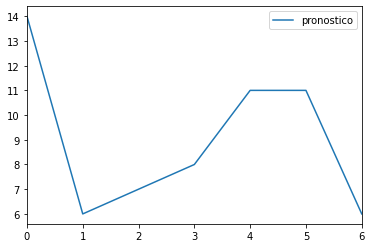

In [671]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Tomate_Chonto.csv')

- Pepino_Cohombro 

In [672]:
 PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Pepino_Cohombro.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.96,-0.61,-0.22,-0.83,-0.74,-0.57,-1.00,-0.61
8,-0.61,-0.22,-0.83,-0.74,-0.57,-1.00,-0.61,-0.43
9,-0.22,-0.83,-0.74,-0.57,-1.00,-0.61,-0.43,-1.00
10,-0.83,-0.74,-0.57,-1.00,-0.61,-0.43,-1.00,-1.00
11,-0.74,-0.57,-1.00,-0.61,-0.43,-1.00,-1.00,-0.13


In [673]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [674]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [675]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_37 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.9199 - mse: 1.0059 - val_loss: 0.8288 - val_mse: 0.7898
Epoch 2/80
218/218 [==============================] - 0s 205us/step - loss: 0.6012 - mse: 0.4437 - val_loss: 0.5646 - val_mse: 0.3653
Epoch 3/80
218/218 [==============================] - 0s 224us/step - loss: 

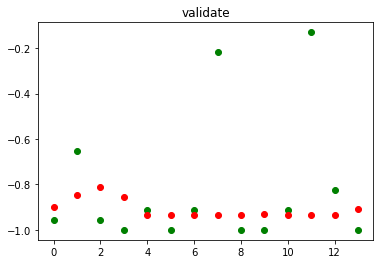

In [676]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [677]:
ultimosDias = Pepino_Cohombro['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     4
2017-11-02     1
2017-11-04     8
2017-11-05     1
2017-11-06     0
2017-11-07     2
2017-11-08     0
2017-11-09     2
2017-12-01    18
2017-12-02     0
2017-12-03     0
2017-12-06     2
2017-12-07    20
2017-12-08     4
2017-12-09     0
Name: Pepino Cohombro / Libra, dtype: int8

In [678]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.60,-0.90,-0.20,-0.90,-1.00,-0.80,-1.00
8,-0.90,-0.20,-0.90,-1.00,-0.80,-1.00,-0.80
9,-0.20,-0.90,-1.00,-0.80,-1.00,-0.80,0.80
10,-0.90,-1.00,-0.80,-1.00,-0.80,0.80,-1.00
11,-1.00,-0.80,-1.00,-0.80,0.80,-1.00,-1.00
12,-0.80,-1.00,-0.80,0.80,-1.00,-1.00,-0.80
13,-1.00,-0.80,0.80,-1.00,-1.00,-0.80,1.00


In [679]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.       , -0.8      ,  0.8000001, -1.       , -1.       ,
         -0.8      ,  1.       ]],

       [[-0.8      ,  0.8000001, -1.       , -1.       , -0.8      ,
          1.       , -0.6      ]]], dtype=float32)

In [680]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.        -0.8        0.8000001 -1.        -1.        -0.8
    1.       ]]

 [[-0.8        0.8000001 -1.        -1.        -0.8        1.
   -0.6      ]]]
[[[-0.8         0.8000001  -1.         -1.         -0.8
    1.         -0.86168265]]

 [[-0.8         0.8000001  -1.         -1.         -0.8
    1.         -0.6       ]]]
[[[ 0.8000001  -1.         -1.         -0.8         1.
   -0.86168265 -0.8089424 ]]

 [[-0.8         0.8000001  -1.         -1.         -0.8
    1.         -0.6       ]]]
[[[-1.         -1.         -0.8         1.         -0.86168265
   -0.8089424  -0.6579658 ]]

 [[-0.8         0.8000001  -1.         -1.         -0.8
    1.         -0.6       ]]]
[[[-1.         -0.8         1.         -0.86168265 -0.8089424
   -0.6579658  -0.91696364]]

 [[-0.8         0.8000001  -1.         -1.         -0.8
    1.         -0.6       ]]]
[[[-0.8         1.         -0.86168265 -0.8089424  -0.6579658
   -0.91696364 -0.8977585 ]]

 [[-0.8         0.8000001  -1.         -1.       

In [681]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[1.38317345],
       [1.9105762 ],
       [3.42034216],
       [0.83036362],
       [1.02241515],
       [1.36176584],
       [1.41316114]])

In [682]:
round(pd.DataFrame(inverted))

,0
0,1.00
1,2.00
2,3.00
3,1.00
4,1.00
5,1.00
6,1.00


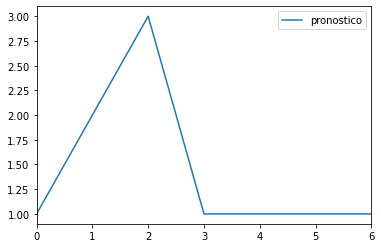

In [683]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Pepino_Cohombro.csv')

 - Pimentón Rojo

In [684]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Pimenton_Rojo.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.60,-0.20,-0.69,-1.00,-0.69,-1.00,-0.96
8,-0.60,-0.20,-0.69,-1.00,-0.69,-1.00,-0.96,-0.64
9,-0.20,-0.69,-1.00,-0.69,-1.00,-0.96,-0.64,-1.00
10,-0.69,-1.00,-0.69,-1.00,-0.96,-0.64,-1.00,-1.00
11,-1.00,-0.69,-1.00,-0.96,-0.64,-1.00,-1.00,-0.78


In [685]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [686]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [687]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_38 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.4786 - mse: 0.3126 - val_loss: 0.5684 - val_mse: 0.4575
Epoch 2/80
218/218 [==============================] - 0s 229us/step - loss: 0.3312 - mse: 0.1728 - val_loss: 0.5170 - val_mse: 0.4013
Epoch 3/80
218/218 [==============================] - 0s 233us/step - loss: 

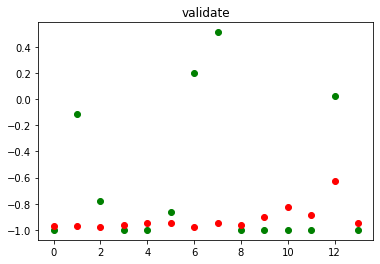

In [688]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [689]:
ultimosDias = Pimenton_Rojo['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     8
2017-11-02     0
2017-11-04    20
2017-11-05     5
2017-11-06     0
2017-11-07     0
2017-11-08     3
2017-11-09    27
2017-12-01    34
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08    23
2017-12-09     0
Name: Pimentón Rojo / Libra, dtype: int8

In [690]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.53,-1.00,0.18,-0.71,-1.00,-1.00,-0.82
8,-1.00,0.18,-0.71,-1.00,-1.00,-0.82,0.59
9,0.18,-0.71,-1.00,-1.00,-0.82,0.59,1.00
10,-0.71,-1.00,-1.00,-0.82,0.59,1.00,-1.00
11,-1.00,-1.00,-0.82,0.59,1.00,-1.00,-1.00
12,-1.00,-0.82,0.59,1.00,-1.00,-1.00,-1.00
13,-0.82,0.59,1.00,-1.00,-1.00,-1.00,-1.00


In [691]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.8235294 ,  0.58823526,  1.        , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[ 0.58823526,  1.        , -1.        , -1.        ,
         -1.        , -1.        ,  0.35294116]]], dtype=float32)

In [692]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.8235294   0.58823526  1.         -1.         -1.
   -1.         -1.        ]]

 [[ 0.58823526  1.         -1.         -1.         -1.
   -1.          0.35294116]]]
[[[ 0.58823526  1.         -1.         -1.         -1.
   -1.         -0.2432792 ]]

 [[ 0.58823526  1.         -1.         -1.         -1.
   -1.          0.35294116]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -0.2432792  -0.88756514]]

 [[ 0.58823526  1.         -1.         -1.         -1.
   -1.          0.35294116]]]
[[[-1.         -1.         -1.         -1.         -0.2432792
   -0.88756514 -0.99020344]]

 [[ 0.58823526  1.         -1.         -1.         -1.
   -1.          0.35294116]]]
[[[-1.         -1.         -1.         -0.2432792  -0.88756514
   -0.99020344 -0.9496607 ]]

 [[ 0.58823526  1.         -1.         -1.         -1.
   -1.          0.35294116]]]
[[[-1.         -1.         -0.2432792  -0.88756514 -0.99020344
   -0.9496607  -0.9703146 ]]

 [[ 0.58823526  1.         -1.         -1.

In [693]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[12.86425349],
       [ 1.91139268],
       [ 0.16654152],
       [ 0.85576778],
       [ 0.50465143],
       [ 0.50417316],
       [ 0.77870995]])

In [694]:
round(pd.DataFrame(inverted))

,0
0,13.00
1,2.00
2,0.00
3,1.00
4,1.00
5,1.00
6,1.00


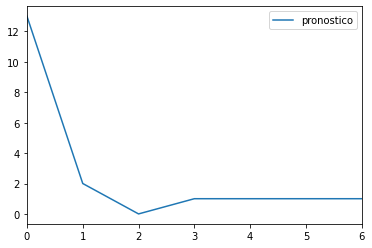

In [695]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Pimenton_Rojo.csv')

- Zuchini_Verde

In [696]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Zucchini_Verde.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.93,0.00,-0.33,-0.33,-1.00,-0.13,-1.00,-0.27
8,0.00,-0.33,-0.33,-1.00,-0.13,-1.00,-0.27,0.07
9,-0.33,-0.33,-1.00,-0.13,-1.00,-0.27,0.07,-1.00
10,-0.33,-1.00,-0.13,-1.00,-0.27,0.07,-1.00,-1.00
11,-1.00,-0.13,-1.00,-0.27,0.07,-1.00,-1.00,-0.67


In [697]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [698]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [699]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_39 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.4753 - mse: 0.3028 - val_loss: 0.4678 - val_mse: 0.2771
Epoch 2/80
218/218 [==============================] - 0s 224us/step - loss: 0.3743 - mse: 0.2029 - val_loss: 0.4065 - val_mse: 0.2398
Epoch 3/80
218/218 [==============================] - 0s 228us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 201us/step - loss: 0.3111 - mse: 0.2116 - val_loss: 0.3631 - val_mse: 0.2736
Epoch 57/80
218/218 [==============================] - 0s 225us/step - loss: 0.3119 - mse: 0.2082 - val_loss: 0.3690 - val_mse: 0.2747
Epoch 58/80
218/218 [==============================] - 0s 220us/step - loss: 0.3111 - mse: 0.2074 - val_loss: 0.3658 - val_mse: 0.2745
Epoch 59/80
218/218 [==============================] - 0s 210us/step - loss: 0.3106 - mse: 0.2094 - val_loss: 0.3637 - val_mse: 0.2743
Epoch 60/80
218/218 [==============================] - 0s 224us/step - loss: 0.3106 - mse: 0.2105 - val_loss: 0.3653 - val_mse: 0.2752
Epoch 61/80
218/218 [==============================] - 0s 242us/step - loss: 0.3106 - mse: 0.2083 - val_loss: 0.3662 - val_mse: 0.2743
Epoch 62/80
218/218 [==============================] - 0s 217us/step - loss: 0.3106 - mse: 0.2093 - val_loss: 0.3624 - val_mse: 0.2737
Epoch 63/80
218/218 [==============================] - 

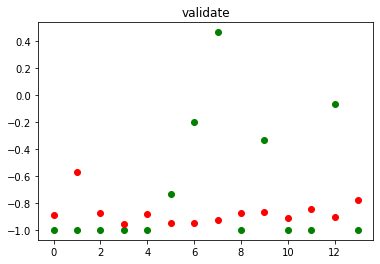

In [700]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [701]:
ultimosDias = Zucchini_Verde['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04     0
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08     4
2017-11-09    12
2017-12-01    22
2017-12-02     0
2017-12-03    10
2017-12-06     0
2017-12-07     0
2017-12-08    14
2017-12-09     0
Name: Zucchini Verde / Libra, dtype: int8

In [702]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.64
8,-1.00,-1.00,-1.00,-1.00,-1.00,-0.64,0.09
9,-1.00,-1.00,-1.00,-1.00,-0.64,0.09,1.00
10,-1.00,-1.00,-1.00,-0.64,0.09,1.00,-1.00
11,-1.00,-1.00,-0.64,0.09,1.00,-1.00,-0.09
12,-1.00,-0.64,0.09,1.00,-1.00,-0.09,-1.00
13,-0.64,0.09,1.00,-1.00,-0.09,-1.00,-1.00


In [703]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.6363636 ,  0.09090912,  1.        , -1.        ,
         -0.09090906, -1.        , -1.        ]],

       [[ 0.09090912,  1.        , -1.        , -0.09090906,
         -1.        , -1.        ,  0.27272725]]], dtype=float32)

In [704]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.6363636   0.09090912  1.         -1.         -0.09090906
   -1.         -1.        ]]

 [[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.          0.27272725]]]
[[[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.         -0.834145  ]]

 [[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.          0.27272725]]]
[[[ 1.         -1.         -0.09090906 -1.         -1.
   -0.834145   -0.6975015 ]]

 [[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.          0.27272725]]]
[[[-1.         -0.09090906 -1.         -1.         -0.834145
   -0.6975015   0.05569688]]

 [[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.          0.27272725]]]
[[[-0.09090906 -1.         -1.         -0.834145   -0.6975015
    0.05569688 -0.9194983 ]]

 [[ 0.09090912  1.         -1.         -0.09090906 -1.
   -1.          0.27272725]]]
[[[-1.         -1.         -0.834145   -0.6975015   0.05569688
   -0.9194983  -0.584642  ]]

 [[ 0.09090912  1.         -1.      

In [705]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[ 1.82440484],
       [ 3.32748361],
       [11.61266532],
       [ 0.88551841],
       [ 4.56893794],
       [ 0.76877908],
       [ 0.96739218]])

In [706]:
round(pd.DataFrame(inverted))

,0
0,2.00
1,3.00
2,12.00
3,1.00
4,5.00
5,1.00
6,1.00


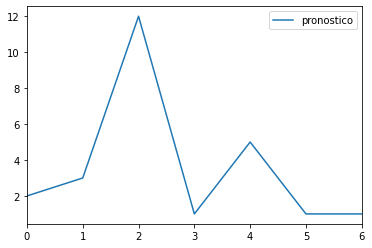

In [707]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Zucchini_Verde.csv')

- Champiñón

In [708]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Champinon.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.88,-0.65,-0.88,-1.00,-0.88,-1.00,-0.88,-1.00
8,-0.65,-0.88,-1.00,-0.88,-1.00,-0.88,-1.00,-1.00
9,-0.88,-1.00,-0.88,-1.00,-0.88,-1.00,-1.00,-1.00
10,-1.00,-0.88,-1.00,-0.88,-1.00,-1.00,-1.00,-1.00
11,-0.88,-1.00,-0.88,-1.00,-1.00,-1.00,-1.00,-0.76


In [709]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [710]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [711]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_40 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.2826 - mse: 0.1277 - val_loss: 0.4669 - val_mse: 0.4373
Epoch 2/80
218/218 [==============================] - 0s 274us/step - loss: 0.2098 - mse: 0.0728 - val_loss: 0.4390 - val_mse: 0.4085
Epoch 3/80
218/218 [==============================] - 0s 229us/step - loss: 

Epoch 56/80
218/218 [==============================] - ETA: 0s - loss: 0.1767 - mse: 0.043 - 0s 174us/step - loss: 0.1879 - mse: 0.0589 - val_loss: 0.4094 - val_mse: 0.3757
Epoch 57/80
218/218 [==============================] - 0s 233us/step - loss: 0.1867 - mse: 0.0584 - val_loss: 0.4116 - val_mse: 0.3817
Epoch 58/80
218/218 [==============================] - 0s 233us/step - loss: 0.1869 - mse: 0.0589 - val_loss: 0.4089 - val_mse: 0.3775
Epoch 59/80
218/218 [==============================] - 0s 174us/step - loss: 0.1862 - mse: 0.0582 - val_loss: 0.4141 - val_mse: 0.3889
Epoch 60/80
218/218 [==============================] - 0s 236us/step - loss: 0.1866 - mse: 0.0585 - val_loss: 0.4109 - val_mse: 0.3842
Epoch 61/80
218/218 [==============================] - 0s 197us/step - loss: 0.1859 - mse: 0.0582 - val_loss: 0.4105 - val_mse: 0.3837
Epoch 62/80
218/218 [==============================] - 0s 195us/step - loss: 0.1870 - mse: 0.0582 - val_loss: 0.4114 - val_mse: 0.3868
Epoch 63/80
218/2

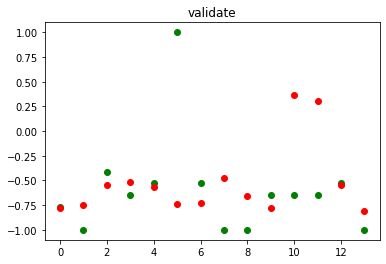

In [712]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [713]:
ultimosDias = Champinon['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     1
2017-11-02     2
2017-11-04     0
2017-11-05     5
2017-11-06     3
2017-11-07     4
2017-11-08    17
2017-11-09     4
2017-12-01     0
2017-12-02     0
2017-12-03     3
2017-12-06     3
2017-12-07     3
2017-12-08     4
2017-12-09     0
Name: Champiñón / Libra, dtype: int8

In [714]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.88,-0.76,-1.00,-0.41,-0.65,-0.53,1.00
8,-0.76,-1.00,-0.41,-0.65,-0.53,1.00,-0.53
9,-1.00,-0.41,-0.65,-0.53,1.00,-0.53,-1.00
10,-0.41,-0.65,-0.53,1.00,-0.53,-1.00,-1.00
11,-0.65,-0.53,1.00,-0.53,-1.00,-1.00,-0.65
12,-0.53,1.00,-0.53,-1.00,-1.00,-0.65,-0.65
13,1.00,-0.53,-1.00,-1.00,-0.65,-0.65,-0.65


In [715]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 1.        , -0.5294118 , -1.        , -1.        ,
         -0.64705884, -0.64705884, -0.64705884]],

       [[-0.5294118 , -1.        , -1.        , -0.64705884,
         -0.64705884, -0.64705884, -0.5294118 ]]], dtype=float32)

In [716]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 1.         -0.5294118  -1.         -1.         -0.64705884
   -0.64705884 -0.64705884]]

 [[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5294118 ]]]
[[[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5417212 ]]

 [[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5294118 ]]]
[[[-1.         -1.         -0.64705884 -0.64705884 -0.64705884
   -0.5417212  -0.8046409 ]]

 [[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5294118 ]]]
[[[-1.         -0.64705884 -0.64705884 -0.64705884 -0.5417212
   -0.8046409  -0.719015  ]]

 [[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5294118 ]]]
[[[-0.64705884 -0.64705884 -0.64705884 -0.5417212  -0.8046409
   -0.719015   -0.6964867 ]]

 [[-0.5294118  -1.         -1.         -0.64705884 -0.64705884
   -0.64705884 -0.5294118 ]]]
[[[-0.64705884 -0.64705884 -0.5417212  -0.8046409  -0.719015
   -0.69648

In [717]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[3.89536957],
       [1.66055244],
       [2.38837247],
       [2.57986294],
       [2.54614558],
       [2.84527769],
       [2.3897176 ]])

In [718]:
round(pd.DataFrame(inverted))

,0
0,4.00
1,2.00
2,2.00
3,3.00
4,3.00
5,3.00
6,2.00


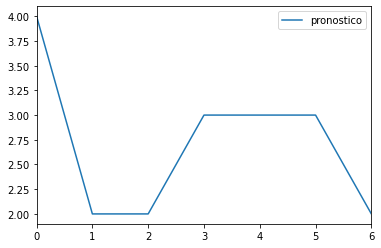

In [719]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Champinon.csv')

- Berenjena

In [720]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Berenjena.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.82,-0.27,-0.45,-0.73,-0.73,-0.09,-1.00,-0.55
8,-0.27,-0.45,-0.73,-0.73,-0.09,-1.00,-0.55,-0.27
9,-0.45,-0.73,-0.73,-0.09,-1.00,-0.55,-0.27,-1.00
10,-0.73,-0.73,-0.09,-1.00,-0.55,-0.27,-1.00,-1.00
11,-0.73,-0.09,-1.00,-0.55,-0.27,-1.00,-1.00,-0.64


In [721]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [722]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [723]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_81 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_41 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 0s 2ms/step - loss: 0.3505 - mse: 0.2132 - val_loss: 0.2925 - val_mse: 0.1599
Epoch 2/80
218/218 [==============================] - 0s 260us/step - loss: 0.2957 - mse: 0.1878 - val_loss: 0.2451 - val_mse: 0.1424
Epoch 3/80
218/218 [==============================] - 0s 259us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 224us/step - loss: 0.2477 - mse: 0.2003 - val_loss: 0.1854 - val_mse: 0.1522
Epoch 57/80
218/218 [==============================] - 0s 229us/step - loss: 0.2470 - mse: 0.2006 - val_loss: 0.1848 - val_mse: 0.1526
Epoch 58/80
218/218 [==============================] - 0s 224us/step - loss: 0.2468 - mse: 0.2012 - val_loss: 0.1850 - val_mse: 0.1526
Epoch 59/80
218/218 [==============================] - 0s 233us/step - loss: 0.2482 - mse: 0.2003 - val_loss: 0.1860 - val_mse: 0.1519
Epoch 60/80
218/218 [==============================] - 0s 206us/step - loss: 0.2476 - mse: 0.2004 - val_loss: 0.1855 - val_mse: 0.1521
Epoch 61/80
218/218 [==============================] - 0s 238us/step - loss: 0.2476 - mse: 0.2012 - val_loss: 0.1844 - val_mse: 0.1528
Epoch 62/80
218/218 [==============================] - 0s 220us/step - loss: 0.2466 - mse: 0.2012 - val_loss: 0.1848 - val_mse: 0.1525
Epoch 63/80
218/218 [==============================] - 

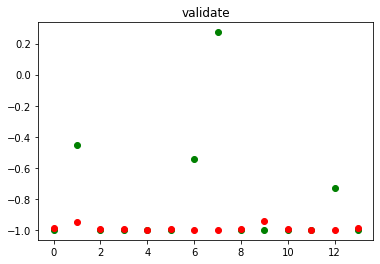

In [724]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [725]:
ultimosDias = Berenjena['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     4
2017-11-02     0
2017-11-04     6
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08     0
2017-11-09     5
2017-12-01    14
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08     3
2017-12-09     0
Name: Berenjena / Libra, dtype: int8

In [726]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.43,-1.00,-0.14,-1.00,-1.00,-1.00,-1.00
8,-1.00,-0.14,-1.00,-1.00,-1.00,-1.00,-0.29
9,-0.14,-1.00,-1.00,-1.00,-1.00,-0.29,1.00
10,-1.00,-1.00,-1.00,-1.00,-0.29,1.00,-1.00
11,-1.00,-1.00,-1.00,-0.29,1.00,-1.00,-1.00
12,-1.00,-1.00,-0.29,1.00,-1.00,-1.00,-1.00
13,-1.00,-0.29,1.00,-1.00,-1.00,-1.00,-1.00


In [727]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.        , -0.28571427,  1.        , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[-0.28571427,  1.        , -1.        , -1.        ,
         -1.        , -1.        , -0.57142854]]], dtype=float32)

In [728]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.         -0.28571427  1.         -1.         -1.
   -1.         -1.        ]]

 [[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.57142854]]]
[[[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.99392295]]

 [[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.57142854]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -0.99392295 -0.898267  ]]

 [[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.57142854]]]
[[[-1.         -1.         -1.         -1.         -0.99392295
   -0.898267   -0.9885234 ]]

 [[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.57142854]]]
[[[-1.         -1.         -1.         -0.99392295 -0.898267
   -0.9885234  -0.9984801 ]]

 [[-0.28571427  1.         -1.         -1.         -1.
   -1.         -0.57142854]]]
[[[-1.         -1.         -0.99392295 -0.898267   -0.9885234
   -0.9984801  -0.99863553]]

 [[-0.28571427  1.         -1.         -1.  

In [729]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.04253936],
       [0.71213117],
       [0.08033603],
       [0.01063943],
       [0.00955129],
       [0.0095129 ],
       [0.00890833]])

In [730]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,1.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


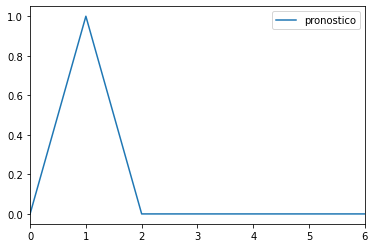

In [731]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Berenjena.csv')

- Perejil Crespo

In [732]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Perejil_Crespo.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.87,-1.00,-1.00,-1.00,-0.60,-1.00,-1.00
8,-0.87,-1.00,-1.00,-1.00,-0.60,-1.00,-1.00,-0.87
9,-1.00,-1.00,-1.00,-0.60,-1.00,-1.00,-0.87,-1.00
10,-1.00,-1.00,-0.60,-1.00,-1.00,-0.87,-1.00,-1.00
11,-1.00,-0.60,-1.00,-1.00,-0.87,-1.00,-1.00,-0.87


In [733]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [734]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [735]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_42 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 2ms/step - loss: 0.8414 - mse: 0.7749 - val_loss: 0.6848 - val_mse: 0.5242
Epoch 2/80
218/218 [==============================] - 0s 215us/step - loss: 0.4247 - mse: 0.2173 - val_loss: 0.3572 - val_mse: 0.1695
Epoch 3/80
218/218 [==============================] - 0s 242us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 252us/step - loss: 0.0958 - mse: 0.0740 - val_loss: 0.0255 - val_mse: 0.0051
Epoch 57/80
218/218 [==============================] - 0s 293us/step - loss: 0.0957 - mse: 0.0740 - val_loss: 0.0253 - val_mse: 0.0051
Epoch 58/80
218/218 [==============================] - 0s 247us/step - loss: 0.0957 - mse: 0.0740 - val_loss: 0.0252 - val_mse: 0.0051
Epoch 59/80
218/218 [==============================] - 0s 247us/step - loss: 0.0957 - mse: 0.0740 - val_loss: 0.0250 - val_mse: 0.0051
Epoch 60/80
218/218 [==============================] - 0s 188us/step - loss: 0.0956 - mse: 0.0740 - val_loss: 0.0249 - val_mse: 0.0051
Epoch 61/80
218/218 [==============================] - 0s 247us/step - loss: 0.0956 - mse: 0.0741 - val_loss: 0.0247 - val_mse: 0.0051
Epoch 62/80
218/218 [==============================] - 0s 220us/step - loss: 0.0955 - mse: 0.0741 - val_loss: 0.0246 - val_mse: 0.0051
Epoch 63/80
218/218 [==============================] - 

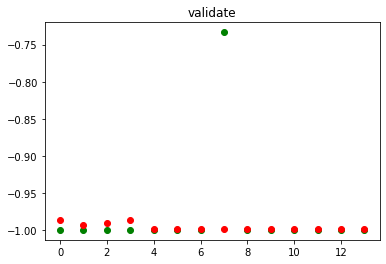

In [736]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [737]:
ultimosDias = Perejil_Crespo['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01    0
2017-11-02    0
2017-11-04    0
2017-11-05    0
2017-11-06    0
2017-11-07    0
2017-11-08    0
2017-11-09    0
2017-12-01    2
2017-12-02    0
2017-12-03    0
2017-12-06    0
2017-12-07    0
2017-12-08    0
2017-12-09    0
Name: Perejil Crespo / 100 gramos, dtype: int8

In [738]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
9,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
10,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00
11,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00
12,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00
13,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00


In [739]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1., -1.,  1., -1., -1., -1., -1.]],

       [[-1.,  1., -1., -1., -1., -1., -1.]]], dtype=float32)

In [740]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1. -1.  1. -1. -1. -1. -1.]]

 [[-1.  1. -1. -1. -1. -1. -1.]]]
[[[-1.         1.        -1.        -1.        -1.        -1.
   -0.9958893]]

 [[-1.         1.        -1.        -1.        -1.        -1.
   -1.       ]]]
[[[ 1.        -1.        -1.        -1.        -1.        -0.9958893
   -0.9945411]]

 [[-1.         1.        -1.        -1.        -1.        -1.
   -1.       ]]]
[[[-1.        -1.        -1.        -1.        -0.9958893 -0.9945411
   -0.986663 ]]

 [[-1.         1.        -1.        -1.        -1.        -1.
   -1.       ]]]
[[[-1.        -1.        -1.        -0.9958893 -0.9945411 -0.986663
   -0.9989076]]

 [[-1.         1.        -1.        -1.        -1.        -1.
   -1.       ]]]
[[[-1.         -1.         -0.9958893  -0.9945411  -0.986663
   -0.9989076  -0.99891204]]

 [[-1.          1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -0.9958893  -0.9945411  -0.986663   -0.9989076
   -0.99891204 -0.9989075 ]]

 [[-1.      

In [741]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.00411069],
       [0.00545889],
       [0.01333702],
       [0.00109237],
       [0.00108796],
       [0.00109249],
       [0.00109762]])

In [742]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


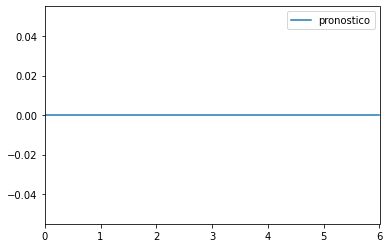

In [743]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Perejil_Crespo.csv')

- Tomate Larga Vida

In [744]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Tomate_Larga_Vida.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.84,-1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,-0.84,-1.00,-1.00
9,-1.00,-1.00,-1.00,-1.00,-0.84,-1.00,-1.00,-1.00
10,-1.00,-1.00,-1.00,-0.84,-1.00,-1.00,-1.00,-1.00
11,-1.00,-1.00,-0.84,-1.00,-1.00,-1.00,-1.00,-1.00


In [745]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [746]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [747]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_43 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 2ms/step - loss: 0.2672 - mse: 0.1947 - val_loss: 0.1513 - val_mse: 0.0482
Epoch 2/80
218/218 [==============================] - 0s 242us/step - loss: 0.2248 - mse: 0.1831 - val_loss: 0.1206 - val_mse: 0.0435
Epoch 3/80
218/218 [==============================] - 0s 238us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 201us/step - loss: 0.1663 - mse: 0.1838 - val_loss: 0.0753 - val_mse: 0.0442
Epoch 57/80
218/218 [==============================] - 0s 274us/step - loss: 0.1663 - mse: 0.1839 - val_loss: 0.0752 - val_mse: 0.0443
Epoch 58/80
218/218 [==============================] - 0s 279us/step - loss: 0.1662 - mse: 0.1837 - val_loss: 0.0753 - val_mse: 0.0442
Epoch 59/80
218/218 [==============================] - 0s 204us/step - loss: 0.1662 - mse: 0.1837 - val_loss: 0.0752 - val_mse: 0.0443
Epoch 60/80
218/218 [==============================] - 0s 251us/step - loss: 0.1662 - mse: 0.1838 - val_loss: 0.0752 - val_mse: 0.0443
Epoch 61/80
218/218 [==============================] - 0s 197us/step - loss: 0.1661 - mse: 0.1837 - val_loss: 0.0752 - val_mse: 0.0443
Epoch 62/80
218/218 [==============================] - 0s 224us/step - loss: 0.1661 - mse: 0.1836 - val_loss: 0.0752 - val_mse: 0.0443
Epoch 63/80
218/218 [==============================] - 

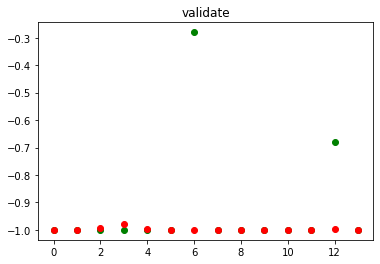

In [748]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [749]:
ultimosDias = Tomate_Larga_Vida['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01    0
2017-11-02    0
2017-11-04    0
2017-11-05    0
2017-11-06    0
2017-11-07    0
2017-11-08    0
2017-11-09    9
2017-12-01    0
2017-12-02    0
2017-12-03    0
2017-12-06    0
2017-12-07    0
2017-12-08    4
2017-12-09    0
Name: Tomate Larga Vida / Libra, dtype: int8

In [750]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
9,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00
10,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00
11,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00
12,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00
13,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [751]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.       ,  1.       , -1.       , -1.       , -1.       ,
         -1.       , -1.       ]],

       [[ 1.       , -1.       , -1.       , -1.       , -1.       ,
         -1.       , -0.1111111]]], dtype=float32)

In [752]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.         1.        -1.        -1.        -1.        -1.
   -1.       ]]

 [[ 1.        -1.        -1.        -1.        -1.        -1.
   -0.1111111]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.92632216]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.1111111 ]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.92632216 -0.9972334 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.1111111 ]]]
[[[-1.         -1.         -1.         -1.         -0.92632216
   -0.9972334  -0.9995843 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.1111111 ]]]
[[[-1.         -1.         -1.         -0.92632216 -0.9972334
   -0.9995843  -0.9995873 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.1111111 ]]]
[[[-1.         -1.         -0.92632216 -0.9972334  -0.9995843
   -0.9995873  -0.9996043 ]]

 [[ 1.         -1.         -1.         -1.         -1.


In [753]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.33155027],
       [0.01244974],
       [0.00187057],
       [0.00185716],
       [0.00178072],
       [0.00197786],
       [0.00206316]])

In [754]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


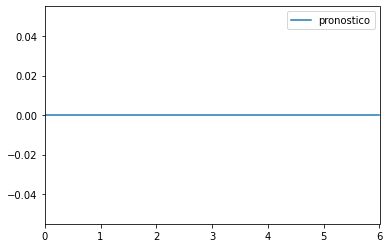

In [755]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Tomate_Larga_Vida.csv')

- Aguacate Haas

In [756]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Aguacate_Haas.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-1.00,-1.00,-0.81,-1.00,-1.00,-1.00,-1.00
8,-1.00,-1.00,-0.81,-1.00,-1.00,-1.00,-1.00,-1.00
9,-1.00,-0.81,-1.00,-1.00,-1.00,-1.00,-1.00,-0.91
10,-0.81,-1.00,-1.00,-1.00,-1.00,-1.00,-0.91,1.00
11,-1.00,-1.00,-1.00,-1.00,-1.00,-0.91,1.00,-1.00


In [757]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [758]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [759]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_87 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_44 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 2ms/step - loss: 0.5149 - mse: 0.3008 - val_loss: 0.2867 - val_mse: 0.0870
Epoch 2/80
218/218 [==============================] - 0s 233us/step - loss: 0.2323 - mse: 0.0844 - val_loss: 0.1399 - val_mse: 0.0198
Epoch 3/80
218/218 [==============================] - 0s 233us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 197us/step - loss: 0.0234 - mse: 0.0331 - val_loss: 0.0186 - val_mse: 0.0044
Epoch 57/80
218/218 [==============================] - 0s 224us/step - loss: 0.0233 - mse: 0.0331 - val_loss: 0.0185 - val_mse: 0.0044
Epoch 58/80
218/218 [==============================] - 0s 333us/step - loss: 0.0233 - mse: 0.0331 - val_loss: 0.0185 - val_mse: 0.0044
Epoch 59/80
218/218 [==============================] - 0s 316us/step - loss: 0.0233 - mse: 0.0331 - val_loss: 0.0185 - val_mse: 0.0044
Epoch 60/80
218/218 [==============================] - 0s 329us/step - loss: 0.0232 - mse: 0.0331 - val_loss: 0.0185 - val_mse: 0.0044
Epoch 61/80
218/218 [==============================] - 0s 307us/step - loss: 0.0232 - mse: 0.0331 - val_loss: 0.0184 - val_mse: 0.0044
Epoch 62/80
218/218 [==============================] - 0s 316us/step - loss: 0.0232 - mse: 0.0331 - val_loss: 0.0184 - val_mse: 0.0044
Epoch 63/80
218/218 [==============================] - 

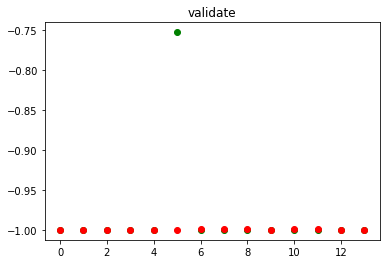

In [760]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [761]:
ultimosDias = Aguacate_Haas['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04     0
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08    14
2017-11-09     0
2017-12-01     0
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08     0
2017-12-09     0
Name: Aguacate Haas / Libra, dtype: int8

In [762]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00
9,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00
10,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00
11,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00
12,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00
13,1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [763]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 1., -1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1., -1.]]], dtype=float32)

In [764]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 1. -1. -1. -1. -1. -1. -1.]]

 [[-1. -1. -1. -1. -1. -1. -1.]]]
[[[-1.         -1.         -1.         -1.         -1.
   -1.         -0.99921507]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.99921507 -0.99951154]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -1.         -0.99921507
   -0.99951154 -0.9995113 ]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -0.99921507 -0.99951154
   -0.9995113  -0.9995113 ]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -0.99921507 -0.99951154 -0.9995113
   -0.9995113  -0.9995112 ]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -0.99921507 -0.99951154 -0.9995113  -0.99951

In [765]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.00549453],
       [0.00341922],
       [0.00342089],
       [0.00342089],
       [0.00342172],
       [0.00342172],
       [0.00342256]])

In [766]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


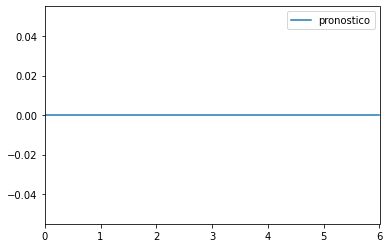

In [767]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Aguacate_Haas.csv')

- Banano Criollo

In [768]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Banano_Criollo.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.62,-0.90,-1.00,-0.86,-1.00,-1.00,-1.00
8,-0.62,-0.90,-1.00,-0.86,-1.00,-1.00,-1.00,-1.00
9,-0.90,-1.00,-0.86,-1.00,-1.00,-1.00,-1.00,-1.00
10,-1.00,-0.86,-1.00,-1.00,-1.00,-1.00,-1.00,-0.76
11,-0.86,-1.00,-1.00,-1.00,-1.00,-1.00,-0.76,-1.00


In [769]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [770]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [771]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_45 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 2ms/step - loss: 1.2955 - mse: 1.8197 - val_loss: 1.0242 - val_mse: 1.1014
Epoch 2/80
218/218 [==============================] - 0s 243us/step - loss: 0.7116 - mse: 0.6185 - val_loss: 0.3819 - val_mse: 0.1835
Epoch 3/80
218/218 [==============================] - 0s 247us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 288us/step - loss: 0.1067 - mse: 0.0782 - val_loss: 0.0758 - val_mse: 0.0293
Epoch 57/80
218/218 [==============================] - 0s 261us/step - loss: 0.1067 - mse: 0.0782 - val_loss: 0.0758 - val_mse: 0.0293
Epoch 58/80
218/218 [==============================] - 0s 210us/step - loss: 0.1066 - mse: 0.0782 - val_loss: 0.0758 - val_mse: 0.0293
Epoch 59/80
218/218 [==============================] - 0s 233us/step - loss: 0.1066 - mse: 0.0782 - val_loss: 0.0757 - val_mse: 0.0293
Epoch 60/80
218/218 [==============================] - 0s 210us/step - loss: 0.1066 - mse: 0.0782 - val_loss: 0.0757 - val_mse: 0.0293
Epoch 61/80
218/218 [==============================] - 0s 211us/step - loss: 0.1065 - mse: 0.0782 - val_loss: 0.0757 - val_mse: 0.0293
Epoch 62/80
218/218 [==============================] - 0s 233us/step - loss: 0.1065 - mse: 0.0782 - val_loss: 0.0757 - val_mse: 0.0293
Epoch 63/80
218/218 [==============================] - 

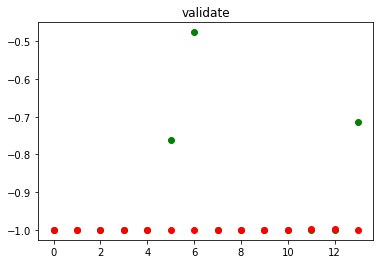

In [772]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [773]:
ultimosDias = Banano_Criollo['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04     0
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08     5
2017-11-09    11
2017-12-01     0
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08     0
2017-12-09     6
Name: Banano Criollo / Libra, dtype: int8

In [774]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-0.09
8,-1.00,-1.00,-1.00,-1.00,-1.00,-0.09,1.00
9,-1.00,-1.00,-1.00,-1.00,-0.09,1.00,-1.00
10,-1.00,-1.00,-1.00,-0.09,1.00,-1.00,-1.00
11,-1.00,-1.00,-0.09,1.00,-1.00,-1.00,-1.00
12,-1.00,-0.09,1.00,-1.00,-1.00,-1.00,-1.00
13,-0.09,1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [775]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.09090906,  1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[ 1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        ]]], dtype=float32)

In [776]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.09090906  1.         -1.         -1.         -1.
   -1.         -1.        ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.98209125]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.98209125 -0.996866  ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -1.         -0.98209125
   -0.996866   -0.9993223 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -1.         -0.98209125 -0.996866
   -0.9993223  -0.9993161 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.         -1.        ]]]
[[[-1.         -1.         -0.98209125 -0.996866   -0.9993223
   -0.9993161  -0.99932075]]

 [[ 1.         -1.         -1.         -1.  

In [777]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.09849813],
       [0.01723707],
       [0.00372738],
       [0.00376147],
       [0.0037359 ],
       [0.00376999],
       [0.00380835]])

In [778]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


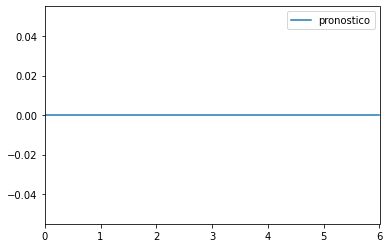

In [779]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Banano_Criollo.csv')

- Aguacate Papelillo

In [780]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Aguacate_Papelillo.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.17,-1.00,-1.00,-0.83,-1.00,-1.00,-0.17
8,-0.17,-1.00,-1.00,-0.83,-1.00,-1.00,-0.17,-1.00
9,-1.00,-1.00,-0.83,-1.00,-1.00,-0.17,-1.00,-1.00
10,-1.00,-0.83,-1.00,-1.00,-0.17,-1.00,-1.00,-1.00
11,-0.83,-1.00,-1.00,-0.17,-1.00,-1.00,-1.00,-1.00


In [781]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [782]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [783]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_46 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 1.3299 - mse: 1.9470 - val_loss: 1.1720 - val_mse: 1.4404
Epoch 2/80
218/218 [==============================] - 0s 238us/step - loss: 0.8171 - mse: 0.8284 - val_loss: 0.5734 - val_mse: 0.3818
Epoch 3/80
218/218 [==============================] - 0s 233us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 224us/step - loss: 0.1658 - mse: 0.1317 - val_loss: 0.0965 - val_mse: 0.0670
Epoch 57/80
218/218 [==============================] - 0s 219us/step - loss: 0.1658 - mse: 0.1318 - val_loss: 0.0964 - val_mse: 0.0670
Epoch 58/80
218/218 [==============================] - 0s 238us/step - loss: 0.1657 - mse: 0.1318 - val_loss: 0.0964 - val_mse: 0.0670
Epoch 59/80
218/218 [==============================] - 0s 269us/step - loss: 0.1657 - mse: 0.1319 - val_loss: 0.0964 - val_mse: 0.0670
Epoch 60/80
218/218 [==============================] - 0s 366us/step - loss: 0.1656 - mse: 0.1319 - val_loss: 0.0963 - val_mse: 0.0670
Epoch 61/80
218/218 [==============================] - 0s 339us/step - loss: 0.1656 - mse: 0.1319 - val_loss: 0.0963 - val_mse: 0.0670
Epoch 62/80
218/218 [==============================] - 0s 316us/step - loss: 0.1655 - mse: 0.1320 - val_loss: 0.0963 - val_mse: 0.0671
Epoch 63/80
218/218 [==============================] - 

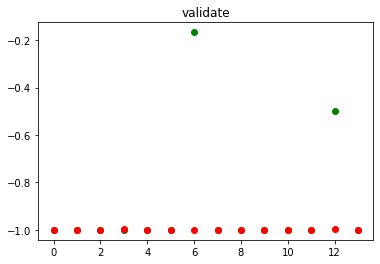

In [784]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [785]:
ultimosDias = Aguacate_Papelillo['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01    0
2017-11-02    0
2017-11-04    0
2017-11-05    0
2017-11-06    0
2017-11-07    0
2017-11-08    0
2017-11-09    5
2017-12-01    0
2017-12-02    0
2017-12-03    0
2017-12-06    0
2017-12-07    0
2017-12-08    3
2017-12-09    0
Name: Aguacate Papelillo / Libra, dtype: int8

In [786]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,1.00
9,-1.00,-1.00,-1.00,-1.00,-1.00,1.00,-1.00
10,-1.00,-1.00,-1.00,-1.00,1.00,-1.00,-1.00
11,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00
12,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00
13,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [787]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.        ,  1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[ 1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        ,  0.20000005]]], dtype=float32)

In [788]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.          1.         -1.         -1.         -1.
   -1.         -1.        ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.20000005]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.97442317]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.20000005]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.97442317 -0.9991589 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.20000005]]]
[[[-1.         -1.         -1.         -1.         -0.97442317
   -0.9991589  -0.9993353 ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.20000005]]]
[[[-1.         -1.         -1.         -0.97442317 -0.9991589
   -0.9993353  -0.99933183]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.20000005]]]
[[[-1.         -1.         -0.97442317 -0.9991589  -0.9993353
   -0.99933183 -0.9993373 ]]

 [[ 1.         -1.         -1.         -1. 

In [789]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.06394207],
       [0.0021027 ],
       [0.00166178],
       [0.00167042],
       [0.00165671],
       [0.00167444],
       [0.0017032 ]])

In [790]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


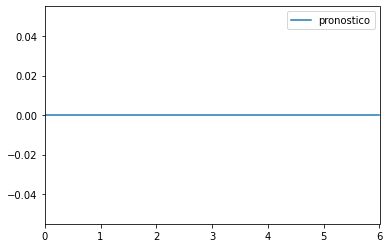

In [791]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Aguacate_Papelillo.csv')

- Cebolla cabezona roja

In [792]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Cebolla_Cabezona_Roja.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.55,-0.95,-0.75,-1.00,-0.55,-1.00,-0.70
8,-0.55,-0.95,-0.75,-1.00,-0.55,-1.00,-0.70,-0.90
9,-0.95,-0.75,-1.00,-0.55,-1.00,-0.70,-0.90,-1.00
10,-0.75,-1.00,-0.55,-1.00,-0.70,-0.90,-1.00,-1.00
11,-1.00,-0.55,-1.00,-0.70,-0.90,-1.00,-1.00,-0.75


In [793]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [794]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [795]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_47 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.6360 - mse: 0.5511 - val_loss: 0.4724 - val_mse: 0.3542
Epoch 2/80
218/218 [==============================] - 0s 267us/step - loss: 0.3144 - mse: 0.1807 - val_loss: 0.3742 - val_mse: 0.2368
Epoch 3/80
218/218 [==============================] - 0s 247us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 252us/step - loss: 0.1744 - mse: 0.1088 - val_loss: 0.2572 - val_mse: 0.2086
Epoch 57/80
218/218 [==============================] - 0s 252us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2570 - val_mse: 0.2086
Epoch 58/80
218/218 [==============================] - 0s 240us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2570 - val_mse: 0.2086
Epoch 59/80
218/218 [==============================] - 0s 247us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2569 - val_mse: 0.2087
Epoch 60/80
218/218 [==============================] - 0s 247us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2568 - val_mse: 0.2087
Epoch 61/80
218/218 [==============================] - 0s 238us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2569 - val_mse: 0.2087
Epoch 62/80
218/218 [==============================] - 0s 229us/step - loss: 0.1743 - mse: 0.1089 - val_loss: 0.2568 - val_mse: 0.2087
Epoch 63/80
218/218 [==============================] - 

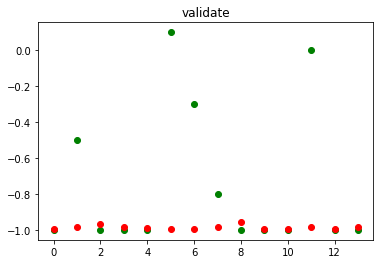

In [796]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [797]:
ultimosDias = Cebolla_Cabezona_Roja['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04    10
2017-11-05     0
2017-11-06     0
2017-11-07     0
2017-11-08    22
2017-11-09    14
2017-12-01     4
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07    20
2017-12-08     0
2017-12-09     0
Name: Cebolla Cabezona Roja / Libra, dtype: int8

In [798]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-0.09,-1.00,-1.00,-1.00,1.00
8,-1.00,-0.09,-1.00,-1.00,-1.00,1.00,0.27
9,-0.09,-1.00,-1.00,-1.00,1.00,0.27,-0.64
10,-1.00,-1.00,-1.00,1.00,0.27,-0.64,-1.00
11,-1.00,-1.00,1.00,0.27,-0.64,-1.00,-1.00
12,-1.00,1.00,0.27,-0.64,-1.00,-1.00,-1.00
13,1.00,0.27,-0.64,-1.00,-1.00,-1.00,0.82


In [799]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 1.        ,  0.27272725, -0.6363636 , -1.        ,
         -1.        , -1.        ,  0.8181819 ]],

       [[ 0.27272725, -0.6363636 , -1.        , -1.        ,
         -1.        ,  0.8181819 , -1.        ]]], dtype=float32)

In [800]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 1.          0.27272725 -0.6363636  -1.         -1.
   -1.          0.8181819 ]]

 [[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -1.        ]]]
[[[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -0.9840958 ]]

 [[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -1.        ]]]
[[[-0.6363636  -1.         -1.         -1.          0.8181819
   -0.9840958  -0.93596876]]

 [[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -1.        ]]]
[[[-1.         -1.         -1.          0.8181819  -0.9840958
   -0.93596876 -0.93057925]]

 [[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -1.        ]]]
[[[-1.         -1.          0.8181819  -0.9840958  -0.93596876
   -0.93057925 -0.9973728 ]]

 [[ 0.27272725 -0.6363636  -1.         -1.         -1.
    0.8181819  -1.        ]]]
[[[-1.          0.8181819  -0.9840958  -0.93596876 -0.93057925
   -0.9973728  -0.9900686 ]]

 [[ 0.27272725 -0.6363636  -1.     

In [801]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.17494606],
       [0.70434366],
       [0.76362828],
       [0.02889913],
       [0.10924524],
       [0.37532549],
       [0.11506611]])

In [802]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,1.00
2,1.00
3,0.00
4,0.00
5,0.00
6,0.00


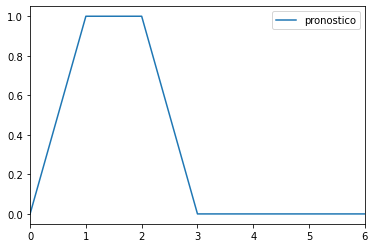

In [803]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Cebolla_Cabezona_Roja.csv')

- Cebolla cabezona blanca

In [804]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Cebolla_Cabezona_Blanca.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.91,-0.97,-1.00,-1.00,-1.00,-1.00,-0.97,-0.94
8,-0.97,-1.00,-1.00,-1.00,-1.00,-0.97,-0.94,-1.00
9,-1.00,-1.00,-1.00,-1.00,-0.97,-0.94,-1.00,-1.00
10,-1.00,-1.00,-1.00,-0.97,-0.94,-1.00,-1.00,-1.00
11,-1.00,-1.00,-0.97,-0.94,-1.00,-1.00,-1.00,-1.00


In [805]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [806]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [807]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_95 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_48 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_96 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.6817 - mse: 0.5184 - val_loss: 0.5078 - val_mse: 0.3124
Epoch 2/80
218/218 [==============================] - 0s 270us/step - loss: 0.3457 - mse: 0.1776 - val_loss: 0.3355 - val_mse: 0.2429
Epoch 3/80
218/218 [==============================] - 0s 247us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 343us/step - loss: 0.1000 - mse: 0.1278 - val_loss: 0.1895 - val_mse: 0.2654
Epoch 57/80
218/218 [==============================] - 0s 325us/step - loss: 0.0998 - mse: 0.1277 - val_loss: 0.1895 - val_mse: 0.2654
Epoch 58/80
218/218 [==============================] - 0s 302us/step - loss: 0.0996 - mse: 0.1275 - val_loss: 0.1894 - val_mse: 0.2654
Epoch 59/80
218/218 [==============================] - 0s 325us/step - loss: 0.0994 - mse: 0.1272 - val_loss: 0.1894 - val_mse: 0.2654
Epoch 60/80
218/218 [==============================] - 0s 297us/step - loss: 0.0990 - mse: 0.1270 - val_loss: 0.1894 - val_mse: 0.2654
Epoch 61/80
218/218 [==============================] - 0s 339us/step - loss: 0.0991 - mse: 0.1268 - val_loss: 0.1894 - val_mse: 0.2654
Epoch 62/80
218/218 [==============================] - 0s 325us/step - loss: 0.0989 - mse: 0.1273 - val_loss: 0.1893 - val_mse: 0.2654
Epoch 63/80
218/218 [==============================] - 

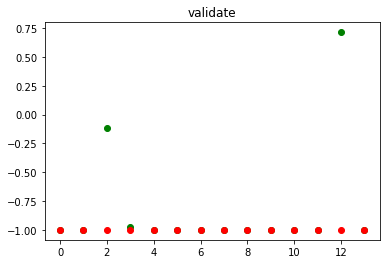

In [808]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [809]:
ultimosDias = Cebolla_Cabezona_Blanca['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04     0
2017-11-05    31
2017-11-06     1
2017-11-07     0
2017-11-08     0
2017-11-09     0
2017-12-01     0
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08    60
2017-12-09     0
Name: Cebolla Cabezona Blanca / Libra, dtype: int8

In [810]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-1.00,0.03,-0.97,-1.00,-1.00
8,-1.00,-1.00,0.03,-0.97,-1.00,-1.00,-1.00
9,-1.00,0.03,-0.97,-1.00,-1.00,-1.00,-1.00
10,0.03,-0.97,-1.00,-1.00,-1.00,-1.00,-1.00
11,-0.97,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
12,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
13,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [811]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1., -1., -1., -1., -1., -1., -1.]],

       [[-1., -1., -1., -1., -1., -1.,  1.]]], dtype=float32)

In [812]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1. -1. -1. -1. -1. -1. -1.]]

 [[-1. -1. -1. -1. -1. -1.  1.]]]
[[[-1.        -1.        -1.        -1.        -1.        -1.
   -0.9991335]]

 [[-1.        -1.        -1.        -1.        -1.        -1.
    1.       ]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.9991335  -0.99913347]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -1.         -1.         -1.         -0.9991335
   -0.99913347 -0.99913365]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -1.         -1.         -0.9991335  -0.99913347
   -0.99913365 -0.99913335]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -1.         -0.9991335  -0.99913347 -0.99913365
   -0.99913335 -0.9991332 ]]

 [[-1.         -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -0.9991335  -0.99913347 -0.99913365 -0.99913335
   -0.99

In [813]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.02599418],
       [0.02599597],
       [0.0259906 ],
       [0.02599954],
       [0.02600312],
       [0.02601206],
       [0.02603888]])

In [814]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


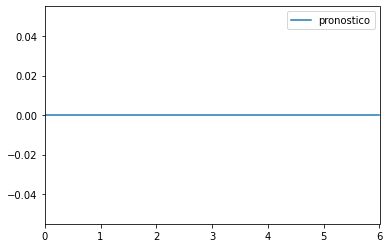

In [815]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Cebolla_Cabezona_Blanca.csv')

- Limón Tahití

In [816]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Limon_Tahití.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.59,-1.00,-0.59,-0.86,-0.86,-0.93,0.45
8,-0.59,-1.00,-0.59,-0.86,-0.86,-0.93,0.45,-0.66
9,-1.00,-0.59,-0.86,-0.86,-0.93,0.45,-0.66,-1.00
10,-0.59,-0.86,-0.86,-0.93,0.45,-0.66,-1.00,-1.00
11,-0.86,-0.86,-0.93,0.45,-0.66,-1.00,-1.00,-1.00


In [817]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [818]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [819]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_49 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_98 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.9637 - mse: 1.1286 - val_loss: 0.7191 - val_mse: 0.6419
Epoch 2/80
218/218 [==============================] - 0s 246us/step - loss: 0.6284 - mse: 0.5349 - val_loss: 0.4545 - val_mse: 0.2819
Epoch 3/80
218/218 [==============================] - 0s 279us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 288us/step - loss: 0.2305 - mse: 0.1996 - val_loss: 0.2682 - val_mse: 0.2716
Epoch 57/80
218/218 [==============================] - 0s 237us/step - loss: 0.2305 - mse: 0.1997 - val_loss: 0.2683 - val_mse: 0.2715
Epoch 58/80
218/218 [==============================] - 0s 242us/step - loss: 0.2305 - mse: 0.1996 - val_loss: 0.2682 - val_mse: 0.2716
Epoch 59/80
218/218 [==============================] - 0s 252us/step - loss: 0.2304 - mse: 0.1997 - val_loss: 0.2683 - val_mse: 0.2718
Epoch 60/80
218/218 [==============================] - 0s 256us/step - loss: 0.2304 - mse: 0.1998 - val_loss: 0.2682 - val_mse: 0.2718
Epoch 61/80
218/218 [==============================] - 0s 263us/step - loss: 0.2304 - mse: 0.1999 - val_loss: 0.2683 - val_mse: 0.2719
Epoch 62/80
218/218 [==============================] - 0s 277us/step - loss: 0.2304 - mse: 0.1999 - val_loss: 0.2683 - val_mse: 0.2721
Epoch 63/80
218/218 [==============================] - 

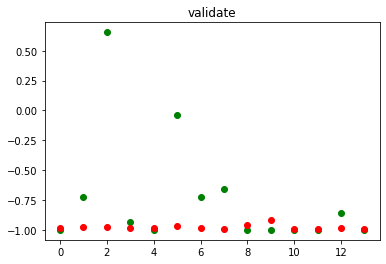

In [820]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [821]:
ultimosDias = Limon_Tahití['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     0
2017-11-02     0
2017-11-04     4
2017-11-05    24
2017-11-06     1
2017-11-07     0
2017-11-08    14
2017-11-09     4
2017-12-01     5
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08     2
2017-12-09     0
Name: Limón Tahití / Libra, dtype: int8

In [822]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,-1.00,-0.67,1.00,-0.92,-1.00,0.17
8,-1.00,-0.67,1.00,-0.92,-1.00,0.17,-0.67
9,-0.67,1.00,-0.92,-1.00,0.17,-0.67,-0.58
10,1.00,-0.92,-1.00,0.17,-0.67,-0.58,-1.00
11,-0.92,-1.00,0.17,-0.67,-0.58,-1.00,-1.00
12,-1.00,0.17,-0.67,-0.58,-1.00,-1.00,-1.00
13,0.17,-0.67,-0.58,-1.00,-1.00,-1.00,-1.00


In [823]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[ 0.16666675, -0.6666666 , -0.5833333 , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[-0.6666666 , -0.5833333 , -1.        , -1.        ,
         -1.        , -1.        , -0.8333333 ]]], dtype=float32)

In [824]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[ 0.16666675 -0.6666666  -0.5833333  -1.         -1.
   -1.         -1.        ]]

 [[-0.6666666  -0.5833333  -1.         -1.         -1.
   -1.         -0.8333333 ]]]
[[[-0.6666666 -0.5833333 -1.        -1.        -1.        -1.
   -0.9742226]]

 [[-0.6666666 -0.5833333 -1.        -1.        -1.        -1.
   -0.8333333]]]
[[[-0.5833333  -1.         -1.         -1.         -1.
   -0.9742226  -0.98877764]]

 [[-0.6666666  -0.5833333  -1.         -1.         -1.
   -1.         -0.8333333 ]]]
[[[-1.         -1.         -1.         -1.         -0.9742226
   -0.98877764 -0.98843926]]

 [[-0.6666666  -0.5833333  -1.         -1.         -1.
   -1.         -0.8333333 ]]]
[[[-1.         -1.         -1.         -0.9742226  -0.98877764
   -0.98843926 -0.99157715]]

 [[-0.6666666  -0.5833333  -1.         -1.         -1.
   -1.         -0.8333333 ]]]
[[[-1.         -1.         -0.9742226  -0.98877764 -0.98843926
   -0.99157715 -0.9916201 ]]

 [[-0.6666666  -0.5833333  -1.         -1.         -1.

In [825]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.30932879],
       [0.13466835],
       [0.13872885],
       [0.10107422],
       [0.10055852],
       [0.09958434],
       [0.10015583]])

In [826]:
round(pd.DataFrame(inverted))

,0
0,0.00
1,0.00
2,0.00
3,0.00
4,0.00
5,0.00
6,0.00


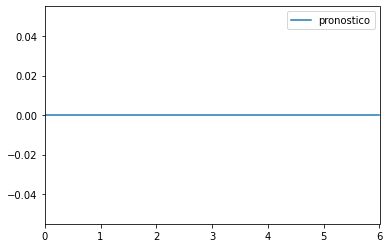

In [827]:
prediccion2SemanaDiciembre = round(pd.DataFrame(inverted))
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Limon_Tahiti.csv')

- Lechuga crespa

In [828]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Lechuga_Crespa.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-0.92,-1.00,-1.00,-1.00,-1.00,-0.92,-0.92
8,-0.92,-1.00,-1.00,-1.00,-1.00,-0.92,-0.92,-1.00
9,-1.00,-1.00,-1.00,-1.00,-0.92,-0.92,-1.00,-1.00
10,-1.00,-1.00,-1.00,-0.92,-0.92,-1.00,-1.00,-1.00
11,-1.00,-1.00,-0.92,-0.92,-1.00,-1.00,-1.00,-1.00


In [829]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [830]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [831]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_50 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_100 (Dense)            (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.5873 - mse: 0.3969 - val_loss: 0.4168 - val_mse: 0.2017
Epoch 2/80
218/218 [==============================] - 0s 298us/step - loss: 0.2829 - mse: 0.1162 - val_loss: 0.2014 - val_mse: 0.0577
Epoch 3/80
218/218 [==============================] - 0s 251us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 279us/step - loss: 0.1588 - mse: 0.0503 - val_loss: 0.1689 - val_mse: 0.0508
Epoch 57/80
218/218 [==============================] - 0s 265us/step - loss: 0.1588 - mse: 0.0502 - val_loss: 0.1790 - val_mse: 0.0587
Epoch 58/80
218/218 [==============================] - 0s 279us/step - loss: 0.1578 - mse: 0.0499 - val_loss: 0.1718 - val_mse: 0.0536
Epoch 59/80
218/218 [==============================] - 0s 264us/step - loss: 0.1580 - mse: 0.0499 - val_loss: 0.1720 - val_mse: 0.0539
Epoch 60/80
218/218 [==============================] - 0s 251us/step - loss: 0.1580 - mse: 0.0498 - val_loss: 0.1772 - val_mse: 0.0586
Epoch 61/80
218/218 [==============================] - 0s 243us/step - loss: 0.1582 - mse: 0.0501 - val_loss: 0.1715 - val_mse: 0.0544
Epoch 62/80
218/218 [==============================] - 0s 251us/step - loss: 0.1575 - mse: 0.0497 - val_loss: 0.1789 - val_mse: 0.0606
Epoch 63/80
218/218 [==============================] - 

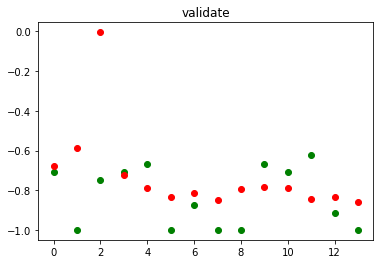

In [832]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [833]:
ultimosDias = Lechuga_Crespa['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01    0
2017-11-02    7
2017-11-04    0
2017-11-05    6
2017-11-06    7
2017-11-07    8
2017-11-08    0
2017-11-09    3
2017-12-01    0
2017-12-02    0
2017-12-03    8
2017-12-06    7
2017-12-07    9
2017-12-08    2
2017-12-09    0
Name: Lechuga Crespa / Unidad, dtype: int8

In [834]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.00,0.56,-1.00,0.33,0.56,0.78,-1.00
8,0.56,-1.00,0.33,0.56,0.78,-1.00,-0.33
9,-1.00,0.33,0.56,0.78,-1.00,-0.33,-1.00
10,0.33,0.56,0.78,-1.00,-0.33,-1.00,-1.00
11,0.56,0.78,-1.00,-0.33,-1.00,-1.00,0.78
12,0.78,-1.00,-0.33,-1.00,-1.00,0.78,0.56
13,-1.00,-0.33,-1.00,-1.00,0.78,0.56,1.00


In [835]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.       , -0.3333333, -1.       , -1.       ,  0.7777778,
          0.5555556,  1.       ]],

       [[-0.3333333, -1.       , -1.       ,  0.7777778,  0.5555556,
          1.       , -0.5555556]]], dtype=float32)

In [836]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.        -0.3333333 -1.        -1.         0.7777778  0.5555556
    1.       ]]

 [[-0.3333333 -1.        -1.         0.7777778  0.5555556  1.
   -0.5555556]]]
[[[-0.3333333  -1.         -1.          0.7777778   0.5555556
    1.         -0.69705164]]

 [[-0.3333333  -1.         -1.          0.7777778   0.5555556
    1.         -0.5555556 ]]]
[[[-1.         -1.          0.7777778   0.5555556   1.
   -0.69705164 -0.30539498]]

 [[-0.3333333  -1.         -1.          0.7777778   0.5555556
    1.         -0.5555556 ]]]
[[[-1.          0.7777778   0.5555556   1.         -0.69705164
   -0.30539498 -0.67205745]]

 [[-0.3333333  -1.         -1.          0.7777778   0.5555556
    1.         -0.5555556 ]]]
[[[ 0.7777778   0.5555556   1.         -0.69705164 -0.30539498
   -0.67205745  0.40037063]]

 [[-0.3333333  -1.         -1.          0.7777778   0.5555556
    1.         -0.5555556 ]]]
[[[ 0.5555556   1.         -0.69705164 -0.30539498 -0.67205745
    0.40037063  0.00700762]]

 [[-0.33333

In [837]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[1.36326759],
       [3.12572258],
       [1.47574146],
       [6.30166778],
       [4.53153428],
       [6.73186553],
       [2.00604932]])

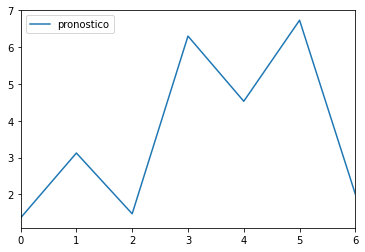

In [838]:
prediccion2SemanaDiciembre = pd.DataFrame(inverted)
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Lechuga_Crespa.csv')

- Plátano maduro

In [839]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Platano_Maduro.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
8,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
9,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
10,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
11,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [840]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [841]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [842]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_101 (Dense)            (None, 1, 7)              56        
_________________________________________________________________
flatten_51 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_102 (Dense)            (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.1869 - mse: 0.0931 - val_loss: 0.2040 - val_mse: 0.1297
Epoch 2/80
218/218 [==============================] - 0s 261us/step - loss: 0.1293 - mse: 0.0779 - val_loss: 0.1935 - val_mse: 0.1416
Epoch 3/80
218/218 [==============================] - 0s 252us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 288us/step - loss: 0.0749 - mse: 0.0760 - val_loss: 0.1796 - val_mse: 0.1575
Epoch 57/80
218/218 [==============================] - 0s 252us/step - loss: 0.0750 - mse: 0.0766 - val_loss: 0.1795 - val_mse: 0.1577
Epoch 58/80
218/218 [==============================] - 0s 231us/step - loss: 0.0745 - mse: 0.0760 - val_loss: 0.1795 - val_mse: 0.1577
Epoch 59/80
218/218 [==============================] - 0s 242us/step - loss: 0.0742 - mse: 0.0762 - val_loss: 0.1794 - val_mse: 0.1575
Epoch 60/80
218/218 [==============================] - 0s 247us/step - loss: 0.0741 - mse: 0.0764 - val_loss: 0.1794 - val_mse: 0.1577
Epoch 61/80
218/218 [==============================] - 0s 252us/step - loss: 0.0738 - mse: 0.0762 - val_loss: 0.1793 - val_mse: 0.1576
Epoch 62/80
218/218 [==============================] - 0s 283us/step - loss: 0.0739 - mse: 0.0760 - val_loss: 0.1794 - val_mse: 0.1578
Epoch 63/80
218/218 [==============================] - 

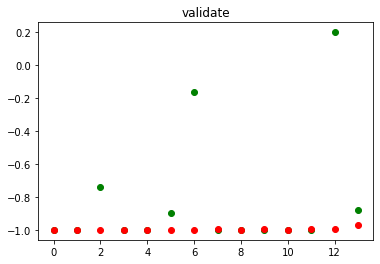

In [843]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [844]:
ultimosDias = Platano_Maduro['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     1
2017-11-02     0
2017-11-04     0
2017-11-05    13
2017-11-06     0
2017-11-07     0
2017-11-08     5
2017-11-09    42
2017-12-01     0
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08    60
2017-12-09     6
Name: Plátano Maduro / Libra, dtype: int8

In [845]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.97,-1.00,-1.00,-0.57,-1.00,-1.00,-0.83
8,-1.00,-1.00,-0.57,-1.00,-1.00,-0.83,0.40
9,-1.00,-0.57,-1.00,-1.00,-0.83,0.40,-1.00
10,-0.57,-1.00,-1.00,-0.83,0.40,-1.00,-1.00
11,-1.00,-1.00,-0.83,0.40,-1.00,-1.00,-1.00
12,-1.00,-0.83,0.40,-1.00,-1.00,-1.00,-1.00
13,-0.83,0.40,-1.00,-1.00,-1.00,-1.00,-1.00


In [846]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-0.8333333,  0.4000001, -1.       , -1.       , -1.       ,
         -1.       , -1.       ]],

       [[ 0.4000001, -1.       , -1.       , -1.       , -1.       ,
         -1.       ,  1.       ]]], dtype=float32)

In [847]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-0.8333333  0.4000001 -1.        -1.        -1.        -1.
   -1.       ]]

 [[ 0.4000001 -1.        -1.        -1.        -1.        -1.
    1.       ]]]
[[[ 0.4000001 -1.        -1.        -1.        -1.        -1.
   -0.9777687]]

 [[ 0.4000001 -1.        -1.        -1.        -1.        -1.
    1.       ]]]
[[[-1.        -1.        -1.        -1.        -1.        -0.9777687
   -0.9984448]]

 [[ 0.4000001 -1.        -1.        -1.        -1.        -1.
    1.       ]]]
[[[-1.         -1.         -1.         -1.         -0.9777687
   -0.9984448  -0.99866134]]

 [[ 0.4000001  -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -1.         -1.         -0.9777687  -0.9984448
   -0.99866134 -0.9986117 ]]

 [[ 0.4000001  -1.         -1.         -1.         -1.
   -1.          1.        ]]]
[[[-1.         -1.         -0.9777687  -0.9984448  -0.99866134
   -0.9986117  -0.9986239 ]]

 [[ 0.4000001  -1.         -1.         -1.         -1.
   -1.          1

In [848]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.66693839],
       [0.04665613],
       [0.04015982],
       [0.04164934],
       [0.04128277],
       [0.04141867],
       [0.04186392]])

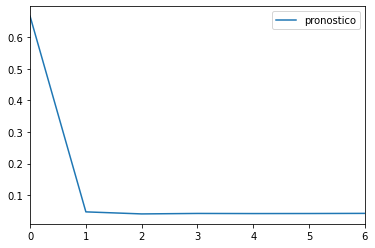

In [849]:
prediccion2SemanaDiciembre = pd.DataFrame(inverted)
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Platano_Maduro.csv')

- Zanahoria

In [850]:
PASOS=7
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
values = Zanahoria.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,-0.93,-0.86,-0.97,-1.00,-0.93,-1.00,-0.80,-0.86
8,-0.86,-0.97,-1.00,-0.93,-1.00,-0.80,-0.86,-1.00
9,-0.97,-1.00,-0.93,-1.00,-0.80,-0.86,-1.00,-1.00
10,-1.00,-0.93,-1.00,-0.80,-0.86,-1.00,-1.00,-1.00
11,-0.93,-1.00,-0.80,-0.86,-1.00,-1.00,-1.00,-0.93


In [851]:
# split into train and test sets
values = reframed.values
n_train_days = 36+203 - (14+PASOS)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(218, 1, 7) (218,) (14, 1, 7) (14,)


In [852]:
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(PASOS, input_shape=(1,PASOS),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [853]:
EPOCHS=80
 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 1, 7)              56        
_________________________________________________________________
flatten_52 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_104 (Dense)            (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Train on 218 samples, validate on 14 samples
Epoch 1/80
218/218 [==============================] - 1s 3ms/step - loss: 0.6556 - mse: 0.5039 - val_loss: 0.3621 - val_mse: 0.1645
Epoch 2/80
218/218 [==============================] - 0s 323us/step - loss: 0.3009 - mse: 0.1570 - val_loss: 0.2125 - val_mse: 0.0551
Epoch 3/80
218/218 [==============================] - 0s 242us/step - loss: 

Epoch 56/80
218/218 [==============================] - 0s 228us/step - loss: 0.1317 - mse: 0.1064 - val_loss: 0.1004 - val_mse: 0.0461
Epoch 57/80
218/218 [==============================] - 0s 243us/step - loss: 0.1315 - mse: 0.1065 - val_loss: 0.1003 - val_mse: 0.0461
Epoch 58/80
218/218 [==============================] - 0s 243us/step - loss: 0.1314 - mse: 0.1065 - val_loss: 0.1004 - val_mse: 0.0461
Epoch 59/80
218/218 [==============================] - 0s 253us/step - loss: 0.1317 - mse: 0.1065 - val_loss: 0.1003 - val_mse: 0.0461
Epoch 60/80
218/218 [==============================] - 0s 274us/step - loss: 0.1315 - mse: 0.1066 - val_loss: 0.1002 - val_mse: 0.0461
Epoch 61/80
218/218 [==============================] - 0s 245us/step - loss: 0.1315 - mse: 0.1066 - val_loss: 0.1001 - val_mse: 0.0461
Epoch 62/80
218/218 [==============================] - 0s 242us/step - loss: 0.1313 - mse: 0.1066 - val_loss: 0.0999 - val_mse: 0.0462
Epoch 63/80
218/218 [==============================] - 

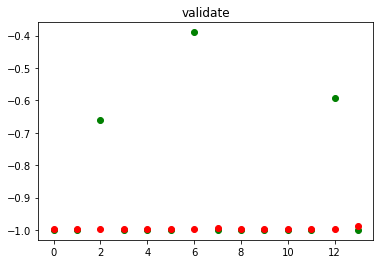

In [854]:
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validate')
plt.show()

In [855]:
ultimosDias = Zanahoria['2017-11-01':'2017-12-09']
ultimosDias

Fecha
2017-11-01     1
2017-11-02     0
2017-11-04     0
2017-11-05    10
2017-11-06     0
2017-11-07     0
2017-11-08     0
2017-11-09    18
2017-12-01     0
2017-12-02     0
2017-12-03     0
2017-12-06     0
2017-12-07     0
2017-12-08    12
2017-12-09     0
Name: Zanahoria / Libra, dtype: int8

In [856]:
values = ultimosDias.values
values = values.astype('float32')
# normalize features
values=values.reshape(-1, 1) # esto lo hacemos porque tenemos 1 sola dimension
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-0.89,-1.00,-1.00,0.11,-1.00,-1.00,-1.00
8,-1.00,-1.00,0.11,-1.00,-1.00,-1.00,1.00
9,-1.00,0.11,-1.00,-1.00,-1.00,1.00,-1.00
10,0.11,-1.00,-1.00,-1.00,1.00,-1.00,-1.00
11,-1.00,-1.00,-1.00,1.00,-1.00,-1.00,-1.00
12,-1.00,-1.00,1.00,-1.00,-1.00,-1.00,-1.00
13,-1.00,1.00,-1.00,-1.00,-1.00,-1.00,-1.00


In [857]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
x_test

array([[[-1.        ,  1.        , -1.        , -1.        ,
         -1.        , -1.        , -1.        ]],

       [[ 1.        , -1.        , -1.        , -1.        ,
         -1.        , -1.        ,  0.33333337]]], dtype=float32)

In [858]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1]=nuevoValor
    return x_test
 
results=[]
for i in range(7):
    parcial=model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test=agregarNuevoValor(x_test,parcial[0])

[[[-1.          1.         -1.         -1.         -1.
   -1.         -1.        ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.33333337]]]
[[[ 1.         -1.         -1.         -1.         -1.
   -1.         -0.98775977]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.33333337]]]
[[[-1.         -1.         -1.         -1.         -1.
   -0.98775977 -0.833811  ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.33333337]]]
[[[-1.         -1.         -1.         -1.         -0.98775977
   -0.833811   -0.99771076]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.33333337]]]
[[[-1.         -1.         -1.         -0.98775977 -0.833811
   -0.99771076 -0.998361  ]]

 [[ 1.         -1.         -1.         -1.         -1.
   -1.          0.33333337]]]
[[[-1.         -1.         -0.98775977 -0.833811   -0.99771076
   -0.998361   -0.9984118 ]]

 [[ 1.         -1.         -1.         -1. 

In [859]:
adimen = [x for x in results]    
inverted = scaler.inverse_transform(adimen)
inverted

array([[0.11016208],
       [1.49570112],
       [0.02060312],
       [0.01475108],
       [0.01429403],
       [0.0143289 ],
       [0.01498443]])

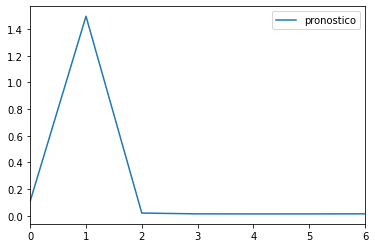

In [860]:
prediccion2SemanaDiciembre = pd.DataFrame(inverted)
prediccion2SemanaDiciembre.columns = ['pronostico']
prediccion2SemanaDiciembre.plot()
prediccion2SemanaDiciembre.to_csv('pronostico_Zanahoria.csv')

# Prophet

In [861]:
#conda install -c conda-forge fbprophet

## III. b.  Predicción mediante Prophet

Referencia:
https://nextjournal.com/eric-brown/forecasting-with-prophet-part-3

In [862]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [863]:
data5=data4.reset_index(level=0, inplace=True)

In [864]:
data4.rename(columns={'Fecha':'ds'}, inplace=True)
data4.head(10)

Nombre_producto,ds,Aguacate Haas / Libra,Aguacate Papelillo / Libra,Banano Criollo / Libra,Berenjena / Libra,Cebolla Cabezona Blanca / Libra,Cebolla Cabezona Roja / Libra,Champiñón / Libra,Lechuga Crespa / Unidad,Limón Tahití / Libra,Pepino Cohombro / Libra,Perejil Crespo / 100 gramos,Pimentón Rojo / Libra,Plátano Maduro / Libra,Tomate Chonto / Libra,Tomate Larga Vida / Libra,Zanahoria / Libra,Zucchini Verde / Libra
0,2016-01-12,0,0,0,2,3,0,1,0,0,1,0,0,0,3,0,2,1
1,2016-02-12,0,5,8,8,1,9,3,2,6,9,1,9,0,18,0,4,15
2,2016-04-12,0,0,2,6,0,1,1,0,0,18,0,18,0,11,0,1,10
3,2016-05-12,11,0,0,3,0,5,0,0,6,4,0,7,0,8,0,0,10
4,2016-06-12,0,1,3,3,0,0,1,0,2,6,0,0,0,25,0,2,0
5,2016-07-12,0,0,0,10,0,9,0,0,2,10,3,7,0,26,0,0,13
6,2016-08-12,0,0,0,0,1,0,1,2,1,0,0,0,0,0,2,6,0
7,2016-09-12,0,5,0,5,2,6,0,2,21,9,0,1,0,27,0,4,11
8,2016-11-12,0,0,0,8,0,2,0,0,5,13,1,8,0,0,0,0,16
9,2016-11-17,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1177]:
Tomate_Chonto2 =data4[['ds','Tomate Chonto / Libra']]
Champinon2 =data4[['ds','Champiñón / Libra']]
Pimenton_Rojo2 =data4[['ds','Pimentón Rojo / Libra']]
Lechuga_Crespa2 =data4[['ds','Lechuga Crespa / Unidad']]
Zucchini_Verde2 =data4[['ds','Zucchini Verde / Libra']]
Cebolla_Cabezona_Roja2 =data4[['ds','Cebolla Cabezona Roja / Libra']]
Pepino_Cohombro2 =data4[['ds','Pepino Cohombro / Libra']]
Cebolla_Cabezona_Blanca2 =data4[['ds','Cebolla Cabezona Blanca / Libra']]
Platano_Maduro2 =data4[['ds','Plátano Maduro / Libra']]
Zanahoria2 =data4[['ds','Zanahoria / Libra']]
Limon_Tahití2 =data4[['ds','Limón Tahití / Libra']]
Berenjena2 =data4[['ds','Berenjena / Libra']]
Perejil_Crespo2 =data4[['ds','Perejil Crespo / 100 gramos']]
Tomate_Larga_Vida2 =data4[['ds','Tomate Larga Vida / Libra']]
Aguacate_Haas2 =data4[['ds','Aguacate Haas / Libra']]
Banano_Criollo2 =data4[['ds','Banano Criollo / Libra']]
Aguacate_Papelillo2 =data4[['ds','Aguacate Papelillo / Libra']]

- Tomate Chonto

In [1178]:
Tomate_Chonto2.rename(columns={'Tomate Chonto / Libra':'y'}, inplace=True)
Tomate_Chonto2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,3
1,2016-02-12,18
2,2016-04-12,11
3,2016-05-12,8
4,2016-06-12,25
5,2016-07-12,26
6,2016-08-12,0
7,2016-09-12,27
8,2016-11-12,0
9,2016-11-17,0


In [1179]:
m1 = Prophet()
m1.fit(Tomate_Chonto2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1180]:
future1 = m1.make_future_dataframe(periods=7)

In [1181]:
forecast = m1.predict(future1)

In [1182]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,17.01,-2.77,37.37
240,2017-12-11,25.54,6.88,48.06
241,2017-12-12,18.61,-0.40,40.87
242,2017-12-13,21.78,1.10,41.65
243,2017-12-14,21.27,0.81,41.52
244,2017-12-15,21.04,0.58,41.59
245,2017-12-16,15.64,-4.25,35.84


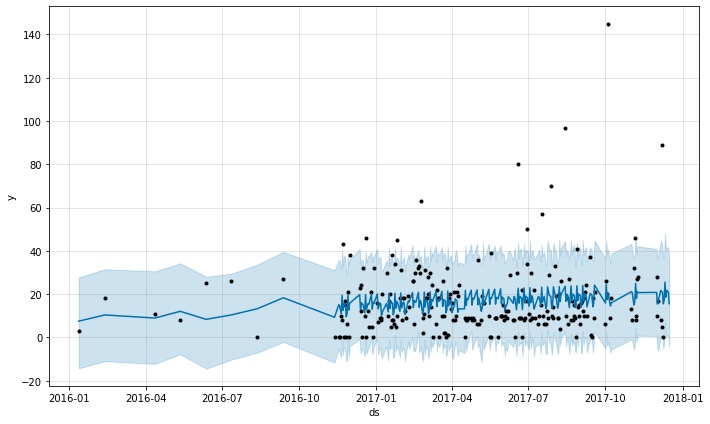

In [1183]:
m1.plot(forecast);

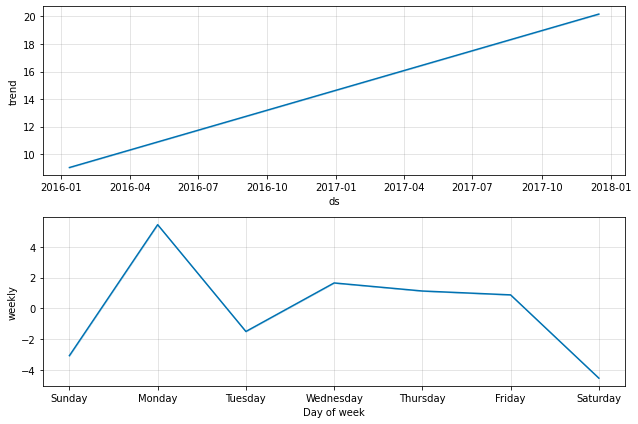

In [1184]:
m1.plot_components(forecast);

In [1185]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1186]:
forecast1.to_csv('pronostico_Tomate_Chonto2.csv')

In [1187]:
#Rolling de fb Prophet con serie original
muestra = int(len(Tomate_Chonto2 ['y'])*0.94)
train = Tomate_Chonto2 [:muestra] 
test = Tomate_Chonto2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Tomate_Chonto2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01 19.11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02 19.54


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04 20.09


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05 19.33


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06 19.59


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07 19.22


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08 19.50


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09 19.73


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01 20.12


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02 19.69


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03 19.85


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06 19.76


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07 20.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08 19.96
            ds  yhat
238 2017-12-09 20.03
[19.10989053 19.54384752 20.08679311 19.32576028 19.58727834 19.21825964
 19.49876514 19.73332914 20.12122335 19.69409171 19.85016714 19.76224433
 20.02868472 19.96365353 20.02948547]


In [1188]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

21.683382837593253


- Champiñón

In [1189]:
Champinon2.rename(columns={'Champiñón / Libra':'y'}, inplace=True)
Champinon2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,1
1,2016-02-12,3
2,2016-04-12,1
3,2016-05-12,0
4,2016-06-12,1
5,2016-07-12,0
6,2016-08-12,1
7,2016-09-12,0
8,2016-11-12,0
9,2016-11-17,0


In [1190]:
m1 = Prophet()
m1.fit(Champinon2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1191]:
future1 = m1.make_future_dataframe(periods=7)

In [1192]:
forecast = m1.predict(future1)

In [1193]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,3.53,0.77,6.26
240,2017-12-11,3.95,1.25,6.55
241,2017-12-12,3.67,0.78,6.36
242,2017-12-13,4.34,1.50,7.11
243,2017-12-14,3.23,0.48,5.91
244,2017-12-15,3.07,0.49,5.81
245,2017-12-16,3.58,0.95,6.18


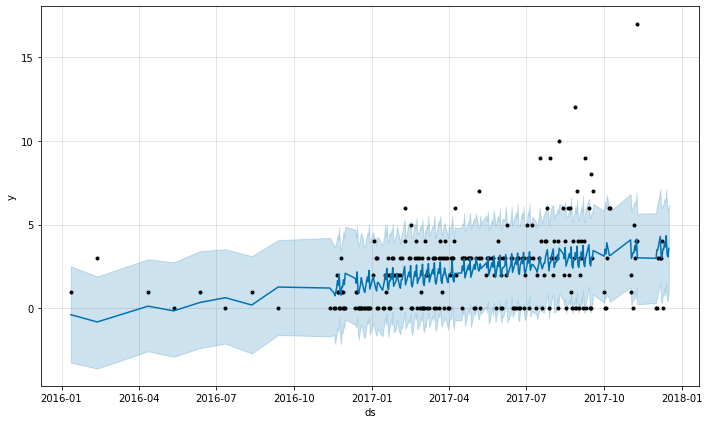

In [1194]:
m1.plot(forecast);

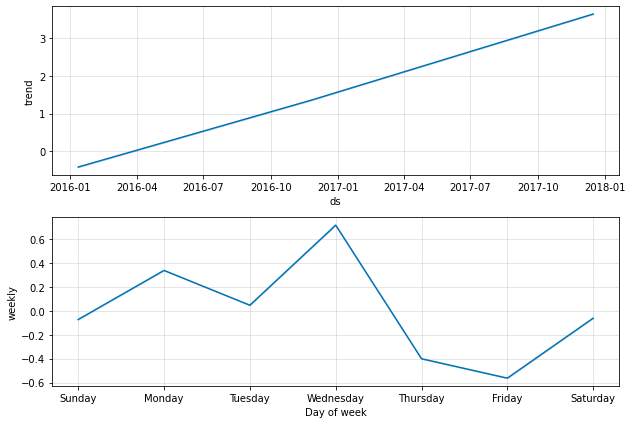

In [1195]:
m1.plot_components(forecast);

In [1196]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1197]:
forecast1.to_csv('pronostico_Champinon2.csv')

In [1198]:
#Rolling de fb Prophet con serie original
muestra = int(len(Champinon2 ['y'])*0.94)
train = Champinon2 [:muestra] 
test = Champinon2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Champinon2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  3.56


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  3.58


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  3.55


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  3.59


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  3.59


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  3.63


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  3.62


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  3.61


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  3.79


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  3.77


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  3.76


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  3.77


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  3.80


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  3.77
            ds  yhat
238 2017-12-09  3.84
[3.56181765 3.58466806 3.55293119 3.59429801 3.59300517 3.62948723
 3.62377376 3.61045    3.79344576 3.76500737 3.76138556 3.76979334
 3.79630301 3.77499125 3.83547213]


In [1199]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

4.069159518907471


- Pimentón Rojo

In [1200]:
Pimenton_Rojo2.rename(columns={'Pimentón Rojo / Libra':'y'}, inplace=True)
Pimenton_Rojo2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,9
2,2016-04-12,18
3,2016-05-12,7
4,2016-06-12,0
5,2016-07-12,7
6,2016-08-12,0
7,2016-09-12,1
8,2016-11-12,8
9,2016-11-17,0


In [1201]:
m1 = Prophet()
m1.fit(Pimenton_Rojo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1202]:
future1 = m1.make_future_dataframe(periods=7)

In [1203]:
forecast = m1.predict(future1)

In [1204]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,7.08,-2.84,17.23
240,2017-12-11,6.28,-4.26,17.35
241,2017-12-12,7.67,-1.49,18.18
242,2017-12-13,4.98,-5.35,15.13
243,2017-12-14,6.61,-3.67,17.22
244,2017-12-15,6.84,-3.67,16.97
245,2017-12-16,4.93,-5.92,14.91


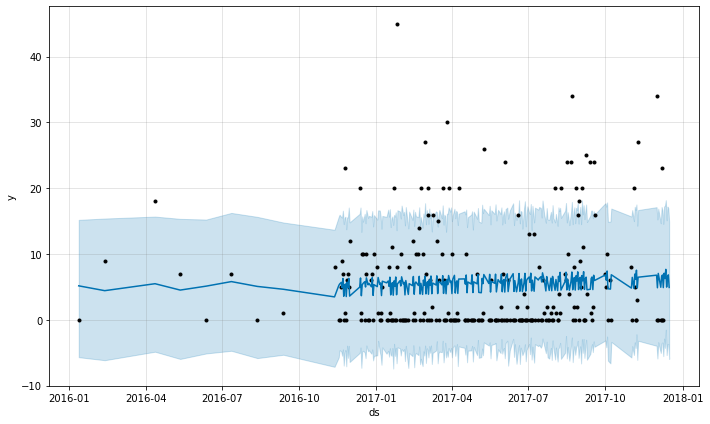

In [1205]:
m1.plot(forecast);

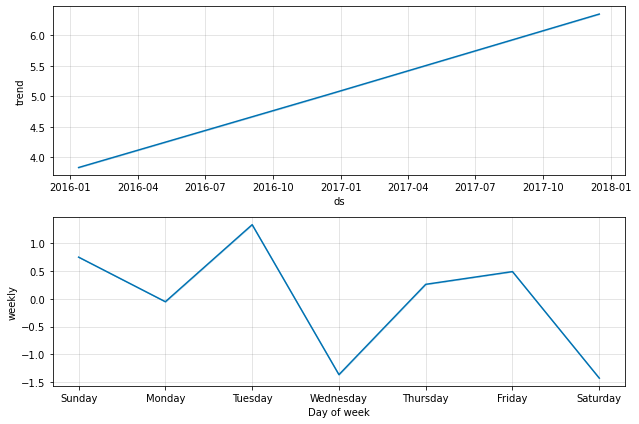

In [1206]:
m1.plot_components(forecast);

In [1207]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1208]:
forecast1.to_csv('pronostico_Pimenton_Rojo2.csv')

In [1209]:
#Rolling de fb Prophet con serie original
muestra = int(len(Pimenton_Rojo2 ['y'])*0.94)
train = Pimenton_Rojo2 [:muestra] 
test = Pimenton_Rojo2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Pimenton_Rojo2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  6.04


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  5.75


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  5.88


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  5.74


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  5.97


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  5.79


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  6.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  5.78


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  5.96


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  5.92


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  5.76


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  6.01


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  5.93


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  5.80
            ds  yhat
238 2017-12-09  5.87
[6.04113031 5.74977819 5.87952588 5.74117649 5.97222183 5.7866422
 6.02717323 5.78191483 5.96320607 5.91658425 5.75984151 6.00811673
 5.9282103  5.80353448 5.86997534]


In [1210]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

11.60751930813827


- Lechuga Crespa

In [1212]:
Lechuga_Crespa2.rename(columns={'Lechuga Crespa / Unidad':'y'}, inplace=True)
Lechuga_Crespa2.head(10)

Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,2
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,0
5,2016-07-12,0
6,2016-08-12,2
7,2016-09-12,2
8,2016-11-12,0
9,2016-11-17,0


In [1213]:
m1 = Prophet()
m1.fit(Lechuga_Crespa2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1214]:
future1 = m1.make_future_dataframe(periods=7)

In [1215]:
forecast = m1.predict(future1)

In [1216]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,6.52,0.49,13.19
240,2017-12-11,7.96,1.43,14.66
241,2017-12-12,6.81,0.34,13.00
242,2017-12-13,8.67,2.78,15.04
243,2017-12-14,6.30,0.11,12.62
244,2017-12-15,5.27,-1.39,11.69
245,2017-12-16,6.70,0.55,13.20


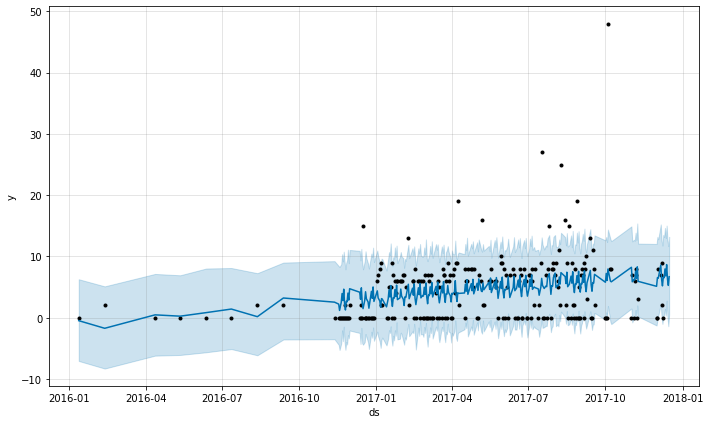

In [1217]:
m1.plot(forecast);

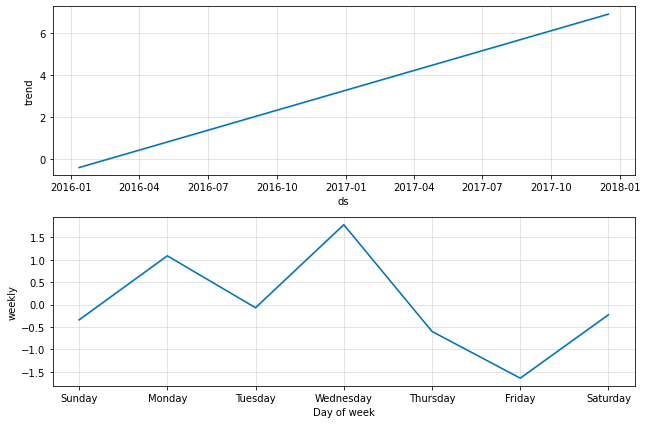

In [1218]:
m1.plot_components(forecast);

In [1219]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1220]:
forecast1.to_csv('pronostico_Lechuga_Crespa2.csv')

In [1221]:
#Rolling de fb Prophet con serie original
muestra = int(len(Lechuga_Crespa2 ['y'])*0.94)
train = Lechuga_Crespa2 [:muestra] 
test = Lechuga_Crespa2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Lechuga_Crespa2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  7.62


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  7.40


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  7.61


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  7.64


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  7.57


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  7.66


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  7.73


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  7.67


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  7.94


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  8.10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  8.01


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  8.02


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  8.04


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  7.97
            ds  yhat
238 2017-12-09  8.10
[7.62428755 7.39579085 7.6145317  7.6407509  7.56570334 7.65559936
 7.73073277 7.6665612  7.93818503 8.09846535 8.01329236 8.01809585
 8.04149739 7.96740025 8.10320007]


In [1222]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

5.371320664870138


- Zucchini Verde

In [1223]:
Zucchini_Verde2.rename(columns={'Zucchini Verde / Libra':'y'}, inplace=True)
Zucchini_Verde2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,1
1,2016-02-12,15
2,2016-04-12,10
3,2016-05-12,10
4,2016-06-12,0
5,2016-07-12,13
6,2016-08-12,0
7,2016-09-12,11
8,2016-11-12,16
9,2016-11-17,0


In [1224]:
m1 = Prophet()
m1.fit(Zucchini_Verde2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1225]:
future1 = m1.make_future_dataframe(periods=7)

In [1226]:
forecast = m1.predict(future1)

In [1227]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,4.23,-4.27,12.68
240,2017-12-11,3.33,-4.47,11.22
241,2017-12-12,4.53,-3.39,12.76
242,2017-12-13,4.07,-4.11,12.51
243,2017-12-14,4.58,-3.90,12.84
244,2017-12-15,4.67,-3.00,13.15
245,2017-12-16,2.63,-5.22,11.10


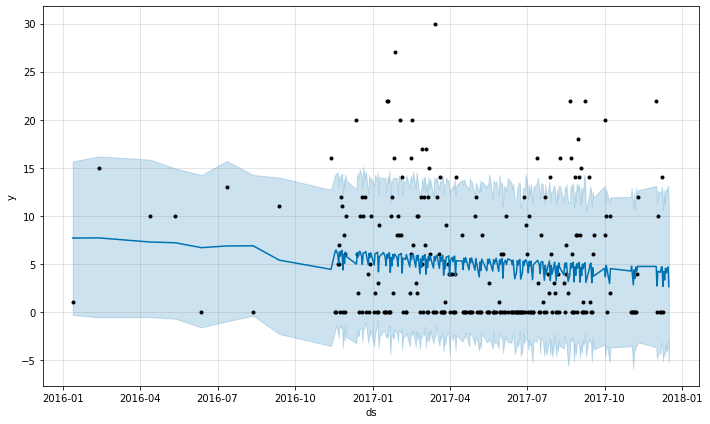

In [1228]:
m1.plot(forecast);

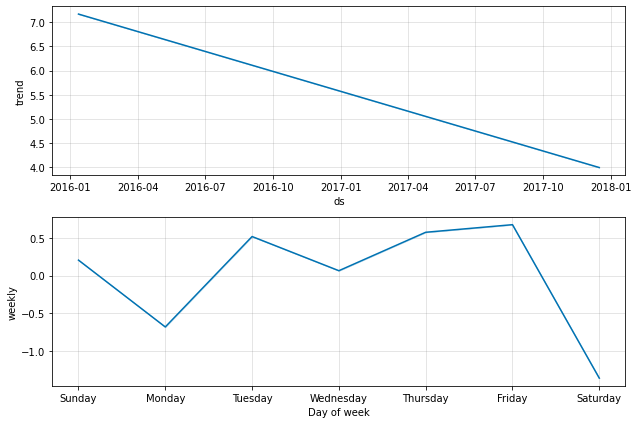

In [1229]:
m1.plot_components(forecast);

In [1230]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1231]:
forecast1.to_csv('pronostico_Zucchini_Verde2.csv')

In [1232]:
#Rolling de fb Prophet con serie original
muestra = int(len(Zucchini_Verde2 ['y'])*0.94)
train = Zucchini_Verde2 [:muestra] 
test = Zucchini_Verde2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Zucchini_Verde2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  4.18


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  3.92


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  4.01


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  3.97


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  4.11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  3.85


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  4.08


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  4.11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  4.24


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  3.78


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  3.97


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  3.97


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  4.08


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  3.80
            ds  yhat
238 2017-12-09  3.79
[4.17800755 3.91912992 4.01494818 3.97156376 4.11478497 3.85112359
 4.08488828 4.10842257 4.23980536 3.78211678 3.96766145 3.97071377
 4.0753457  3.80061926 3.7946775 ]


In [1233]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

6.711558425031116


- Cebolla Cabezona Roja

In [1234]:
Cebolla_Cabezona_Roja2.rename(columns={'Cebolla Cabezona Roja / Libra':'y'}, inplace=True)
Cebolla_Cabezona_Roja2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,9
2,2016-04-12,1
3,2016-05-12,5
4,2016-06-12,0
5,2016-07-12,9
6,2016-08-12,0
7,2016-09-12,6
8,2016-11-12,2
9,2016-11-17,0


In [1235]:
m1 = Prophet()
m1.fit(Cebolla_Cabezona_Roja2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1236]:
future1 = m1.make_future_dataframe(periods=7)

In [1237]:
forecast = m1.predict(future1)

In [1238]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,2.96,-4.30,10.33
240,2017-12-11,4.81,-3.07,12.59
241,2017-12-12,2.94,-3.97,10.32
242,2017-12-13,4.47,-2.65,11.81
243,2017-12-14,5.26,-2.71,12.98
244,2017-12-15,4.64,-2.44,11.89
245,2017-12-16,3.44,-4.28,10.52


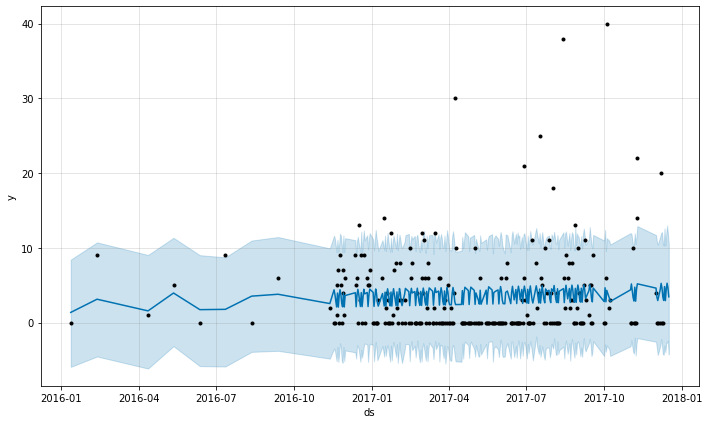

In [1239]:
m1.plot(forecast);

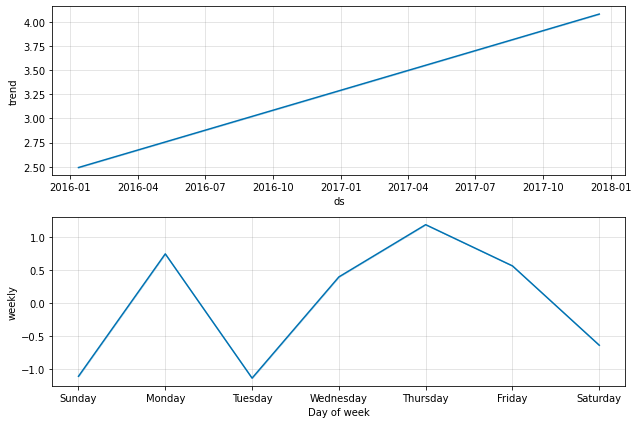

In [1240]:
m1.plot_components(forecast);

In [1241]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1242]:
forecast1.to_csv('pronostico_Cebolla_Cabezona_Roja2.csv')

In [1243]:
#Rolling de fb Prophet con serie original
muestra = int(len(Cebolla_Cabezona_Roja2 ['y'])*0.94)
train = Cebolla_Cabezona_Roja2 [:muestra] 
test = Cebolla_Cabezona_Roja2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Cebolla_Cabezona_Roja2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  4.57


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  4.62


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  4.29


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  4.15


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  4.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  4.16


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  4.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  4.22


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  4.21


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  4.46


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  4.36


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  4.35


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  4.23


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  4.29
            ds  yhat
238 2017-12-09  4.41
[4.56904166 4.62266205 4.29440129 4.14688426 4.19214235 4.15726209
 4.18807348 4.21666323 4.21208621 4.45907613 4.35711232 4.34788465
 4.22632663 4.28877434 4.41159132]


In [1244]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

7.678160830088936


- Pepino Cohombro

In [1245]:
Pepino_Cohombro2.rename(columns={'Pepino Cohombro / Libra':'y'}, inplace=True)
Pepino_Cohombro2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,1
1,2016-02-12,9
2,2016-04-12,18
3,2016-05-12,4
4,2016-06-12,6
5,2016-07-12,10
6,2016-08-12,0
7,2016-09-12,9
8,2016-11-12,13
9,2016-11-17,0


In [1246]:
m1 = Prophet()
m1.fit(Pepino_Cohombro2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1247]:
future1 = m1.make_future_dataframe(periods=7)

In [1248]:
forecast = m1.predict(future1)

In [1249]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,2.52,-7.98,12.91
240,2017-12-11,4.55,-6.11,14.34
241,2017-12-12,6.36,-3.99,16.81
242,2017-12-13,4.12,-5.79,15.11
243,2017-12-14,4.03,-6.84,13.99
244,2017-12-15,3.28,-7.03,13.30
245,2017-12-16,2.17,-8.17,12.91


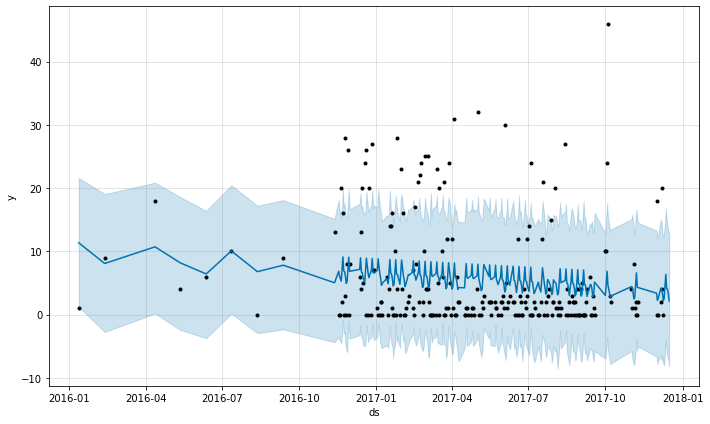

In [1250]:
m1.plot(forecast);

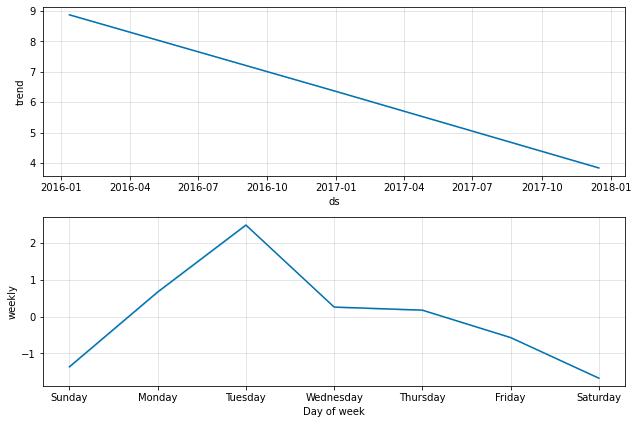

In [1251]:
m1.plot_components(forecast);

In [1252]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1253]:
forecast1.to_csv('pronostico_Pepino_Cohombro2.csv')

In [1254]:
#Rolling de fb Prophet con serie original
muestra = int(len(Pepino_Cohombro2 ['y'])*0.94)
train = Pepino_Cohombro2 [:muestra] 
test = Pepino_Cohombro2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Pepino_Cohombro2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  3.41


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  3.56


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  3.43


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  4.07


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  3.44


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  3.75


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  3.87


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  3.61


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  3.45


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  3.46


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  3.20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  3.48


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  3.35


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  3.53
            ds  yhat
238 2017-12-09  3.67
[3.41223231 3.55682386 3.43439521 4.06709995 3.43919296 3.75311654
 3.86965594 3.60815965 3.4483382  3.45595412 3.19764517 3.47650122
 3.3524717  3.53135973 3.67373974]


In [1255]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

6.306357664944377


- Cebolla Cabezona Blanca

In [1256]:
Cebolla_Cabezona_Blanca2.rename(columns={'Cebolla Cabezona Blanca / Libra':'y'}, inplace=True)
Cebolla_Cabezona_Blanca2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,3
1,2016-02-12,1
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,0
5,2016-07-12,0
6,2016-08-12,1
7,2016-09-12,2
8,2016-11-12,0
9,2016-11-17,0


In [1257]:
m1 = Prophet()
m1.fit(Cebolla_Cabezona_Blanca2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1258]:
future1 = m1.make_future_dataframe(periods=7)

In [1259]:
forecast = m1.predict(future1)

In [1260]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,11.77,-4.87,26.57
240,2017-12-11,8.78,-7.66,24.70
241,2017-12-12,10.93,-4.70,27.22
242,2017-12-13,10.29,-5.41,27.16
243,2017-12-14,6.55,-9.10,21.76
244,2017-12-15,10.94,-4.39,25.22
245,2017-12-16,5.63,-10.34,21.39


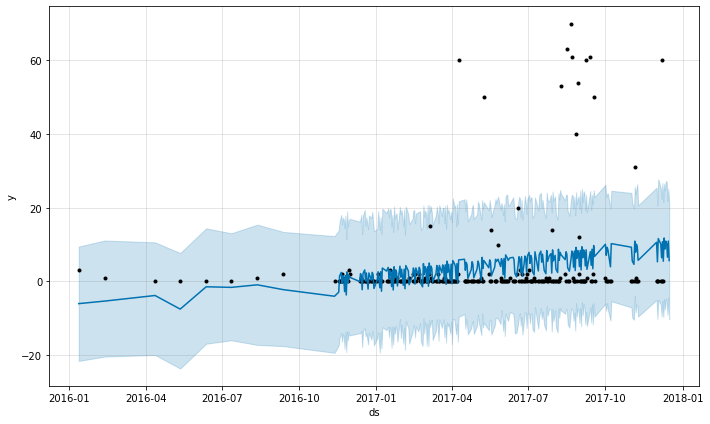

In [1261]:
m1.plot(forecast);

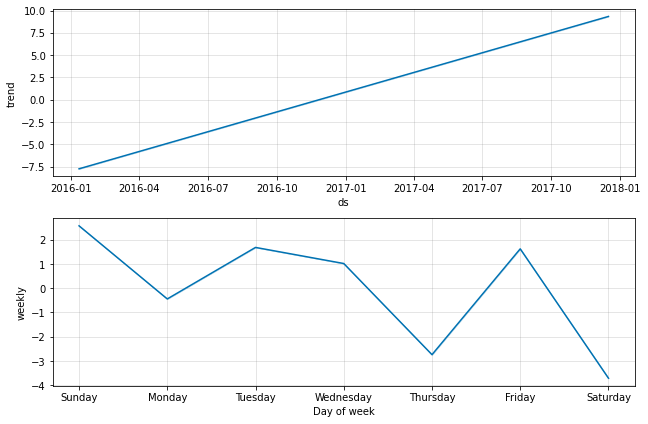

In [1262]:
m1.plot_components(forecast);

In [1263]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1264]:
forecast1.to_csv('pronostico_Cebolla_Cabezona_Blanca2.csv')

In [1265]:
#Rolling de fb Prophet con serie original
muestra = int(len(Cebolla_Cabezona_Blanca2 ['y'])*0.94)
train = Cebolla_Cabezona_Blanca2 [:muestra] 
test = Cebolla_Cabezona_Blanca2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Cebolla_Cabezona_Blanca2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  8.20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  8.22


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  8.25


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  8.07


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  8.42


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  8.76


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  8.48


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  8.40


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  8.81


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  8.79


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  9.41


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  9.23


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  9.46


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  9.00
            ds  yhat
238 2017-12-09  9.59
[8.20020738 8.2159118  8.25479718 8.06569419 8.4176847  8.75729564
 8.47637262 8.39545519 8.81099473 8.78554596 9.41295565 9.2269671
 9.45771141 8.99956709 9.59269289]


In [1266]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

16.56096982270597


- Plátano Maduro

In [1267]:
Platano_Maduro2.rename(columns={'Plátano Maduro / Libra':'y'}, inplace=True)
Platano_Maduro2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,0
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,0
5,2016-07-12,0
6,2016-08-12,0
7,2016-09-12,0
8,2016-11-12,0
9,2016-11-17,0


In [1268]:
m1 = Prophet()
m1.fit(Platano_Maduro2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1269]:
future1 = m1.make_future_dataframe(periods=7)

In [1270]:
forecast = m1.predict(future1)

In [1271]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,15.08,-2.69,33.69
240,2017-12-11,12.73,-5.27,30.28
241,2017-12-12,13.66,-3.89,31.95
242,2017-12-13,12.56,-6.17,29.88
243,2017-12-14,12.10,-7.44,29.48
244,2017-12-15,12.44,-4.83,30.42
245,2017-12-16,6.92,-12.12,23.10


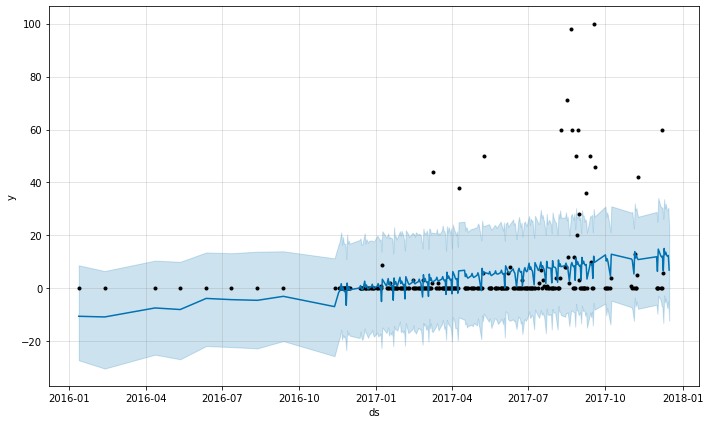

In [1272]:
m1.plot(forecast);

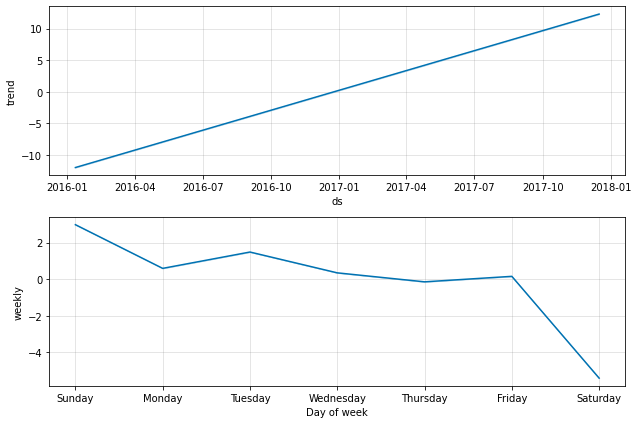

In [1273]:
m1.plot_components(forecast);

In [1274]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1275]:
forecast1.to_csv('pronostico_Platano_Maduro2.csv')

In [1276]:
#Rolling de fb Prophet con serie original
muestra = int(len(Platano_Maduro2 ['y'])*0.94)
train = Platano_Maduro2 [:muestra] 
test = Platano_Maduro2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Platano_Maduro2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01 11.11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02 11.60


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04 11.69


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05 11.50


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06 11.70


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07 11.63


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08 11.66


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09 11.98


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01 12.62


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02 12.35


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03 12.56


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06 12.66


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07 12.70


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08 12.67
            ds  yhat
238 2017-12-09 12.59
[11.10690902 11.60342435 11.69451914 11.50312581 11.70387198 11.62653668
 11.65553715 11.9757432  12.62169475 12.34899628 12.56182154 12.65534234
 12.70473762 12.66765818 12.59020442]


In [1277]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

17.642097937043175


- Zanahoria

In [1278]:
Zanahoria2.rename(columns={'Zanahoria / Libra':'y'}, inplace=True)
Zanahoria2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,2
1,2016-02-12,4
2,2016-04-12,1
3,2016-05-12,0
4,2016-06-12,2
5,2016-07-12,0
6,2016-08-12,6
7,2016-09-12,4
8,2016-11-12,0
9,2016-11-17,0


In [1279]:
m1 = Prophet()
m1.fit(Zanahoria2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1280]:
future1 = m1.make_future_dataframe(periods=7)

In [1281]:
forecast = m1.predict(future1)

In [1282]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,8.61,-1.90,20.61
240,2017-12-11,7.75,-2.96,19.21
241,2017-12-12,8.89,-2.33,18.88
242,2017-12-13,7.47,-3.57,18.99
243,2017-12-14,8.96,-1.73,19.86
244,2017-12-15,9.29,-1.94,20.92
245,2017-12-16,6.49,-4.83,17.54


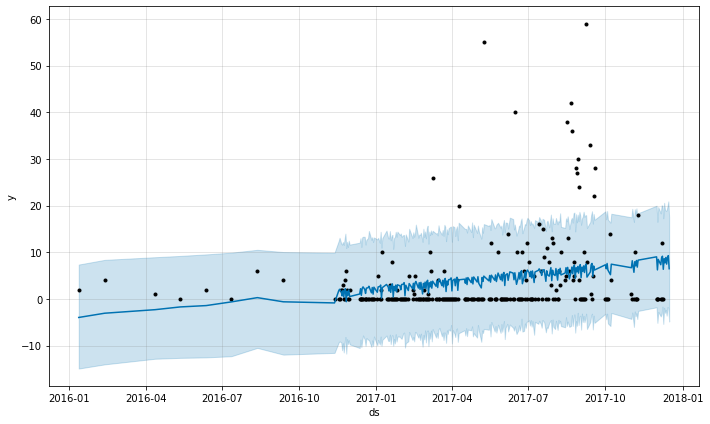

In [1283]:
m1.plot(forecast);

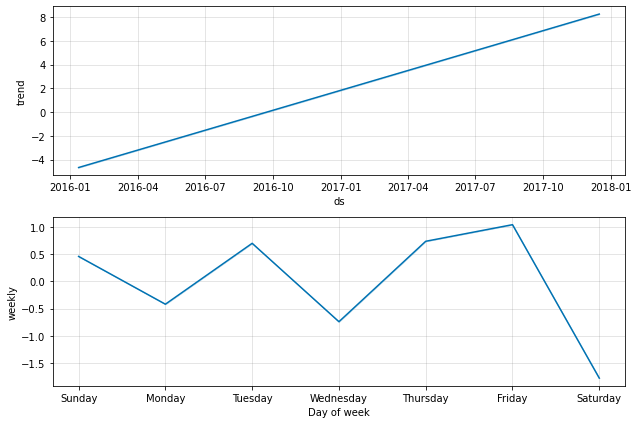

In [1284]:
m1.plot_components(forecast);

In [1285]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1286]:
forecast1.to_csv('pronostico_Zanahoria2.csv')

In [1287]:
#Rolling de fb Prophet con serie original
muestra = int(len(Zanahoria2 ['y'])*0.94)
train = Zanahoria2 [:muestra] 
test = Zanahoria2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Zanahoria2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  9.14


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  9.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  9.20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  9.30


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  9.44


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  9.31


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  9.37


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  9.34


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  9.95


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  9.94


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  9.90


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06 10.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07 10.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08 10.07
            ds  yhat
238 2017-12-09 10.14
[ 9.1405007   9.19491537  9.19787679  9.2956989   9.4357683   9.31207524
  9.37019367  9.33598665  9.94524797  9.93813246  9.89816085 10.18632243
 10.05199947 10.07461454 10.1444257 ]


In [1288]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

8.875410545447124


- Limón Tahití

In [1289]:
Limon_Tahití2.rename(columns={'Limón Tahití / Libra':'y'}, inplace=True)
Limon_Tahití2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,6
2,2016-04-12,0
3,2016-05-12,6
4,2016-06-12,2
5,2016-07-12,2
6,2016-08-12,1
7,2016-09-12,21
8,2016-11-12,5
9,2016-11-17,0


In [1290]:
m1 = Prophet()
m1.fit(Limon_Tahití2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1291]:
future1 = m1.make_future_dataframe(periods=7)

In [1292]:
forecast = m1.predict(future1)

In [1293]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,3.28,-4.15,10.24
240,2017-12-11,5.07,-1.55,12.13
241,2017-12-12,3.09,-4.62,10.42
242,2017-12-13,3.41,-4.25,10.53
243,2017-12-14,3.70,-3.19,10.74
244,2017-12-15,4.29,-3.04,11.87
245,2017-12-16,3.24,-3.97,10.81


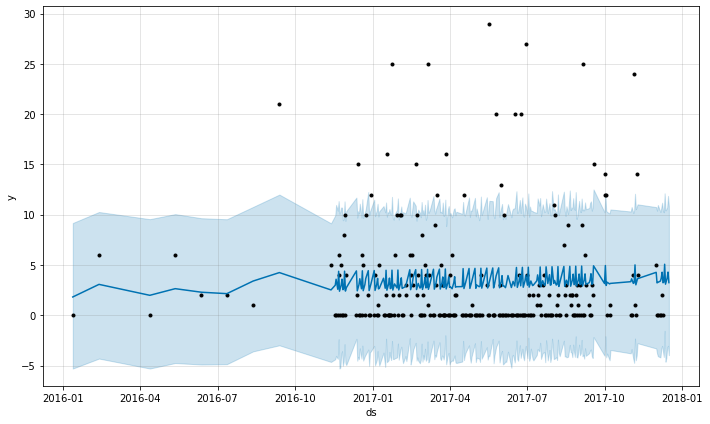

In [1294]:
m1.plot(forecast);

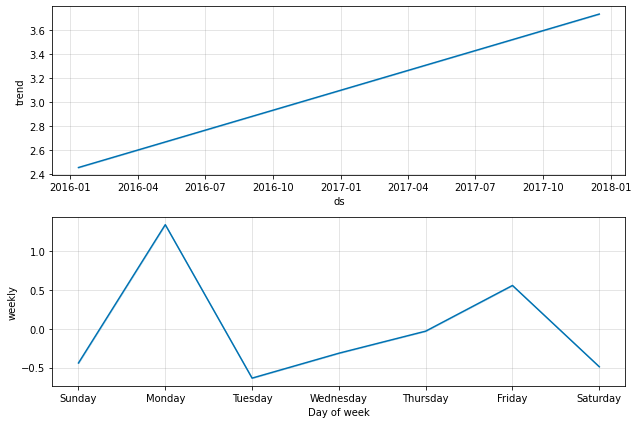

In [1295]:
m1.plot_components(forecast);

In [1296]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1297]:
forecast1.to_csv('pronostico_Limon_Tahití2.csv')

In [1298]:
#Rolling de fb Prophet con serie original
muestra = int(len(Limon_Tahití2 ['y'])*0.94)
train = Limon_Tahití2 [:muestra] 
test = Limon_Tahití2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Limon_Tahití2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  3.70


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  3.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  3.30


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  3.28


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  3.26


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  3.18


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  3.32


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  3.28


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  3.20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  3.46


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  3.30


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  3.31


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  3.38


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  3.30
            ds  yhat
238 2017-12-09  3.23
[3.69935838 3.18993141 3.30483734 3.27548903 3.25649287 3.17919629
 3.31965925 3.27867781 3.20247917 3.46002818 3.29714656 3.31474678
 3.38044338 3.29997501 3.23051698]


In [1299]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

6.553643895105353


- Berenjena

In [1300]:
Berenjena2.rename(columns={'Berenjena / Libra':'y'}, inplace=True)
Berenjena2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,2
1,2016-02-12,8
2,2016-04-12,6
3,2016-05-12,3
4,2016-06-12,3
5,2016-07-12,10
6,2016-08-12,0
7,2016-09-12,5
8,2016-11-12,8
9,2016-11-17,0


In [1301]:
m1 = Prophet()
m1.fit(Berenjena2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1302]:
future1 = m1.make_future_dataframe(periods=7)

In [1303]:
forecast = m1.predict(future1)

In [1304]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,1.16,-4.07,6.59
240,2017-12-11,1.63,-3.98,7.09
241,2017-12-12,2.25,-2.81,7.26
242,2017-12-13,1.20,-4.21,6.65
243,2017-12-14,1.27,-4.01,6.76
244,2017-12-15,1.19,-4.21,6.43
245,2017-12-16,1.39,-3.58,6.73


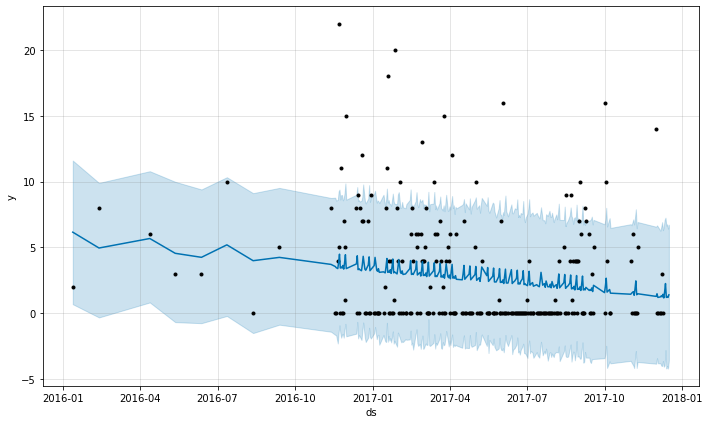

In [1305]:
m1.plot(forecast);

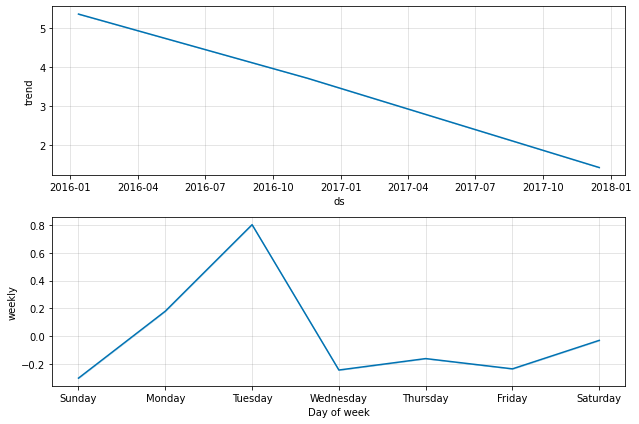

In [1306]:
m1.plot_components(forecast);

In [1307]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1308]:
forecast1.to_csv('pronostico_Berenjena2.csv')

In [1309]:
#Rolling de fb Prophet con serie original
muestra = int(len(Berenjena2 ['y'])*0.94)
train = Berenjena2 [:muestra] 
test = Berenjena2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Berenjena2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  1.35


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  1.39


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  1.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  1.33


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  1.23


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  1.21


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  1.30


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  1.30


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  1.16


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  1.23


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  1.18


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  1.25


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  1.02


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  1.06
            ds  yhat
238 2017-12-09  1.07
[1.35378    1.38549404 1.18647662 1.32723354 1.22657401 1.20520684
 1.2999664  1.29568676 1.1595383  1.23427934 1.18158957 1.24799374
 1.02019731 1.05509683 1.0656482 ]


In [1310]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

3.894749355238627


- Perejil Crespo

In [1311]:
Perejil_Crespo2.rename(columns={'Perejil Crespo / 100 gramos':'y'}, inplace=True)
Perejil_Crespo2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,1
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,0
5,2016-07-12,3
6,2016-08-12,0
7,2016-09-12,0
8,2016-11-12,1
9,2016-11-17,0


In [1312]:
m1 = Prophet()
m1.fit(Perejil_Crespo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1313]:
future1 = m1.make_future_dataframe(periods=7)

In [1314]:
forecast = m1.predict(future1)

In [1315]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,0.52,-1.75,2.78
240,2017-12-11,0.35,-2.00,2.60
241,2017-12-12,1.50,-0.84,3.93
242,2017-12-13,0.73,-1.75,2.94
243,2017-12-14,0.59,-1.72,2.83
244,2017-12-15,0.99,-1.17,3.20
245,2017-12-16,0.52,-1.78,2.87


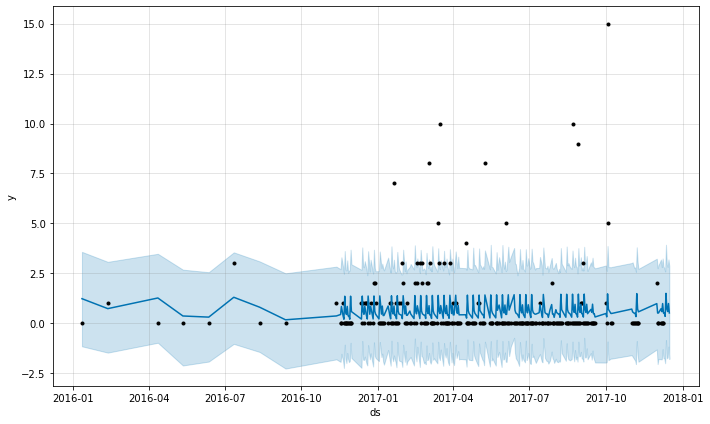

In [1316]:
m1.plot(forecast);

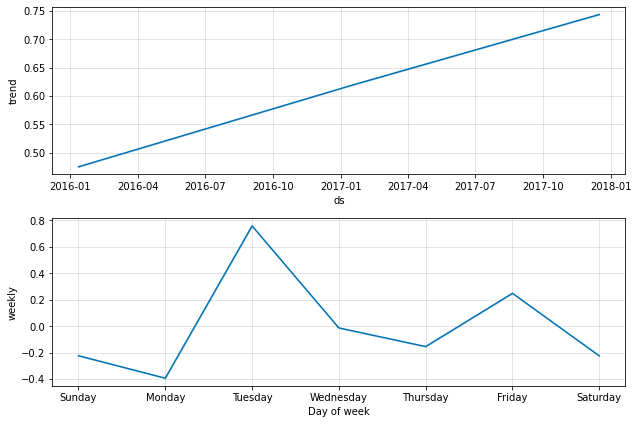

In [1317]:
m1.plot_components(forecast);

In [1318]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1319]:
forecast1.to_csv('pronostico_Perejil_Crespo2.csv')

In [1320]:
#Rolling de fb Prophet con serie original
muestra = int(len(Perejil_Crespo2 ['y'])*0.94)
train = Perejil_Crespo2 [:muestra] 
test = Perejil_Crespo2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Perejil_Crespo2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  0.80


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  0.93


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  0.97


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  0.82


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  0.92


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  0.83


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  0.92


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  0.81


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  0.95


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  0.95


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  0.84


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  0.92


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  0.85


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  0.93
            ds  yhat
238 2017-12-09  0.83
[0.8038457  0.93426797 0.96814542 0.81983888 0.92270803 0.83141496
 0.91500391 0.8097624  0.94698966 0.95080062 0.84310871 0.9224993
 0.8498798  0.93282374 0.82956468]


In [1321]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

0.8951490501570102


- Tomate Larga Vida

In [1322]:
Tomate_Larga_Vida2.rename(columns={'Tomate Larga Vida / Libra':'y'}, inplace=True)
Tomate_Larga_Vida2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,0
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,0
5,2016-07-12,0
6,2016-08-12,2
7,2016-09-12,0
8,2016-11-12,0
9,2016-11-17,0


In [1323]:
m1 = Prophet()
m1.fit(Tomate_Larga_Vida2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1324]:
future1 = m1.make_future_dataframe(periods=7)

In [1325]:
forecast = m1.predict(future1)

In [1326]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,2.89,-2.96,8.86
240,2017-12-11,2.71,-3.52,8.40
241,2017-12-12,4.08,-1.58,10.24
242,2017-12-13,4.18,-1.59,10.08
243,2017-12-14,3.76,-2.10,9.72
244,2017-12-15,4.00,-2.60,9.96
245,2017-12-16,2.76,-3.15,8.77


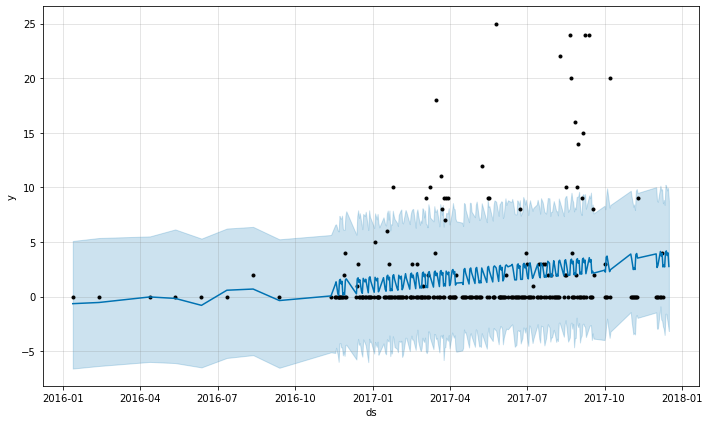

In [1327]:
m1.plot(forecast);

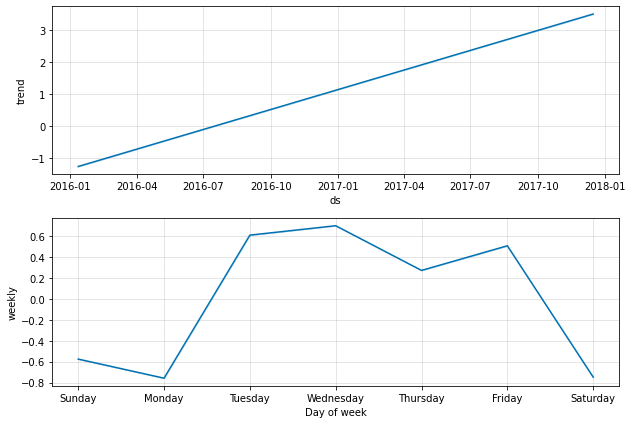

In [1328]:
m1.plot_components(forecast);

In [1329]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1330]:
forecast1.to_csv('pronostico_Tomate_Larga_Vida2.csv')

In [1331]:
#Rolling de fb Prophet con serie original
muestra = int(len(Tomate_Larga_Vida2 ['y'])*0.94)
train = Tomate_Larga_Vida2 [:muestra] 
test = Tomate_Larga_Vida2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Tomate_Larga_Vida2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  4.19


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  4.11


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  4.13


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  4.15


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  4.34


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  4.08


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  4.16


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  4.09


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  4.32


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  4.47


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  4.29


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  4.46


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  4.41


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  4.47
            ds  yhat
238 2017-12-09  4.51
[4.19270826 4.11268431 4.13408096 4.14892416 4.34225403 4.07528987
 4.15916064 4.09480847 4.31578406 4.47395985 4.28731571 4.45574671
 4.40977453 4.4670998  4.50566072]


In [1332]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

4.182998814485668


- Aguacate Haas

In [1333]:
Aguacate_Haas2.rename(columns={'Aguacate Haas / Libra':'y'}, inplace=True)
Aguacate_Haas2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,0
2,2016-04-12,0
3,2016-05-12,11
4,2016-06-12,0
5,2016-07-12,0
6,2016-08-12,0
7,2016-09-12,0
8,2016-11-12,0
9,2016-11-17,5


In [1334]:
m1 = Prophet()
m1.fit(Aguacate_Haas2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1335]:
future1 = m1.make_future_dataframe(periods=7)

In [1336]:
forecast = m1.predict(future1)

In [1337]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,0.11,-12.45,13.07
240,2017-12-11,2.77,-10.47,15.42
241,2017-12-12,0.22,-12.06,12.67
242,2017-12-13,0.69,-11.35,12.55
243,2017-12-14,0.74,-11.99,11.86
244,2017-12-15,4.46,-6.84,16.10
245,2017-12-16,0.76,-12.84,12.56


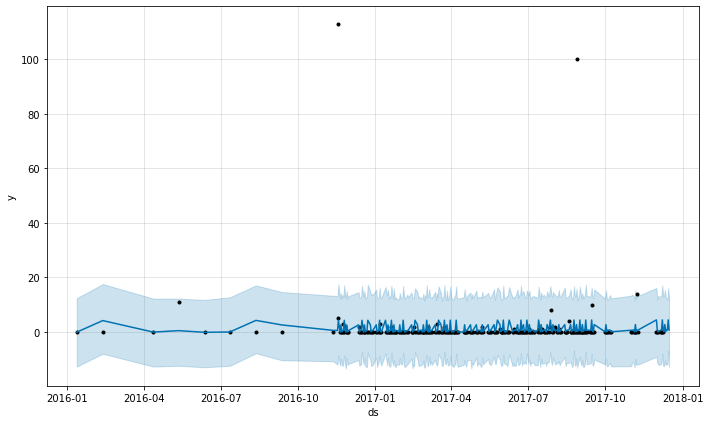

In [1338]:
m1.plot(forecast);

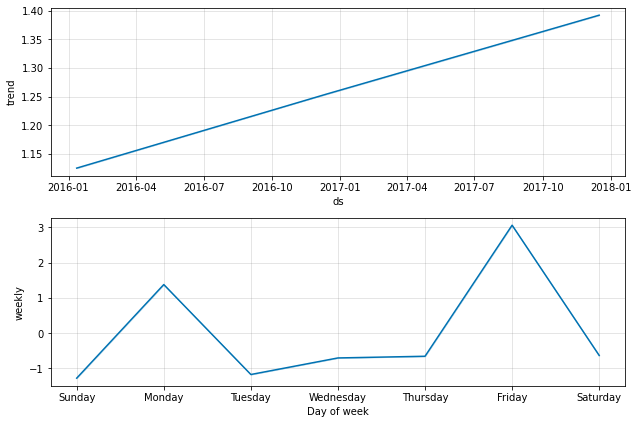

In [1339]:
m1.plot_components(forecast);

In [1340]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1341]:
forecast1.to_csv('pronostico_Aguacate_Haas2.csv')

In [1342]:
#Rolling de fb Prophet con serie original
muestra = int(len(Aguacate_Haas2 ['y'])*0.94)
train = Aguacate_Haas2 [:muestra] 
test = Aguacate_Haas2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Aguacate_Haas2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  1.37


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  1.56


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  0.91


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  1.50


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  0.93


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  1.49


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  1.13


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  1.54


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  0.90


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  1.53


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  1.63


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  1.69


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  1.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  1.53
            ds  yhat
238 2017-12-09  1.62
[1.36653697 1.55670392 0.90826303 1.50375091 0.93227278 1.48751384
 1.12649492 1.53717691 0.89909354 1.532629   1.62599035 1.69497503
 1.0293872  1.52632884 1.61772778]


In [1343]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

3.589143830904024


- Banano Criollo

In [1344]:
Banano_Criollo2.rename(columns={'Banano Criollo / Libra':'y'}, inplace=True)
Banano_Criollo2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,8
2,2016-04-12,2
3,2016-05-12,0
4,2016-06-12,3
5,2016-07-12,0
6,2016-08-12,0
7,2016-09-12,0
8,2016-11-12,0
9,2016-11-17,0


In [1345]:
m1 = Prophet()
m1.fit(Banano_Criollo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1346]:
future1 = m1.make_future_dataframe(periods=7)

In [1347]:
forecast = m1.predict(future1)

In [1348]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,3.47,-2.96,9.93
240,2017-12-11,2.07,-4.74,8.57
241,2017-12-12,1.64,-5.26,8.38
242,2017-12-13,3.70,-3.00,10.17
243,2017-12-14,2.82,-3.74,9.90
244,2017-12-15,4.58,-2.11,11.45
245,2017-12-16,2.31,-4.38,9.36


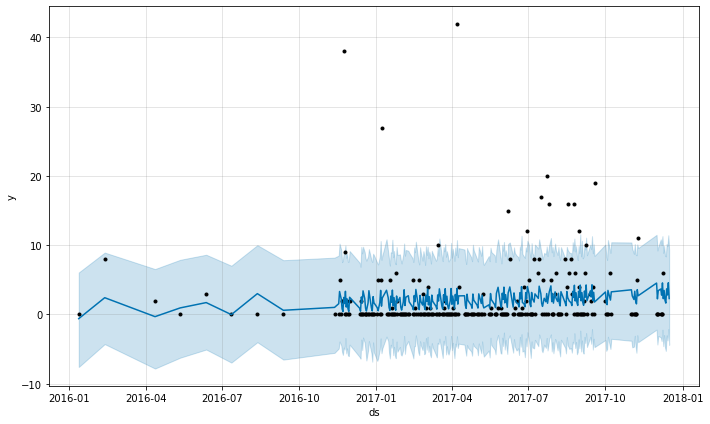

In [1349]:
m1.plot(forecast);

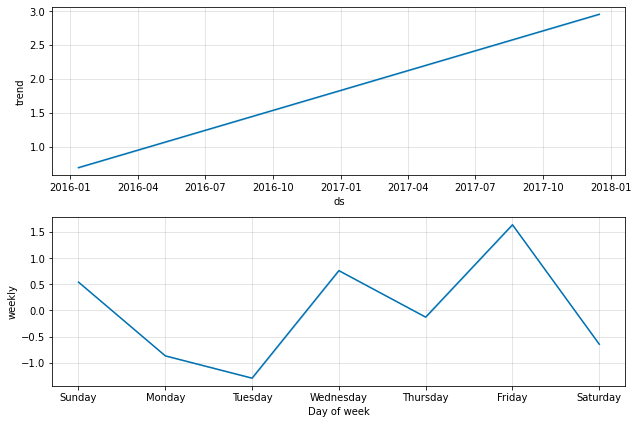

In [1350]:
m1.plot_components(forecast);

In [1351]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1352]:
forecast1.to_csv('pronostico_Banano_Criollo2.csv')

In [1353]:
#Rolling de fb Prophet con serie original
muestra = int(len(Banano_Criollo2 ['y'])*0.94)
train = Banano_Criollo2 [:muestra] 
test = Banano_Criollo2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Banano_Criollo2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  2.91


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  3.09


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  3.15


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  3.14


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  3.15


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  3.15


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  3.17


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  3.17


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  3.27


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  3.27


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  3.27


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  3.29


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  3.29


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  3.32
            ds  yhat
238 2017-12-09  3.30
[2.91142509 3.09119404 3.15090746 3.13620619 3.14952973 3.15308458
 3.17036274 3.17221343 3.26844887 3.2708607  3.27136932 3.29208279
 3.29366704 3.31559845 3.30303238]


In [1354]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

3.599214755229875


- Aguacate Papelillo

In [1355]:
Aguacate_Papelillo2.rename(columns={'Aguacate Papelillo / Libra':'y'}, inplace=True)
Aguacate_Papelillo2.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Nombre_producto,ds,y
0,2016-01-12,0
1,2016-02-12,5
2,2016-04-12,0
3,2016-05-12,0
4,2016-06-12,1
5,2016-07-12,0
6,2016-08-12,0
7,2016-09-12,5
8,2016-11-12,0
9,2016-11-17,0


In [1356]:
m1 = Prophet()
m1.fit(Aguacate_Papelillo2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [1357]:
future1 = m1.make_future_dataframe(periods=7)

In [1358]:
forecast = m1.predict(future1)

In [1359]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
239,2017-12-10,0.89,-1.34,3.49
240,2017-12-11,0.98,-1.67,3.50
241,2017-12-12,1.57,-0.73,3.85
242,2017-12-13,1.15,-1.12,3.38
243,2017-12-14,0.87,-1.67,3.17
244,2017-12-15,1.01,-1.34,3.52
245,2017-12-16,0.84,-1.54,3.35


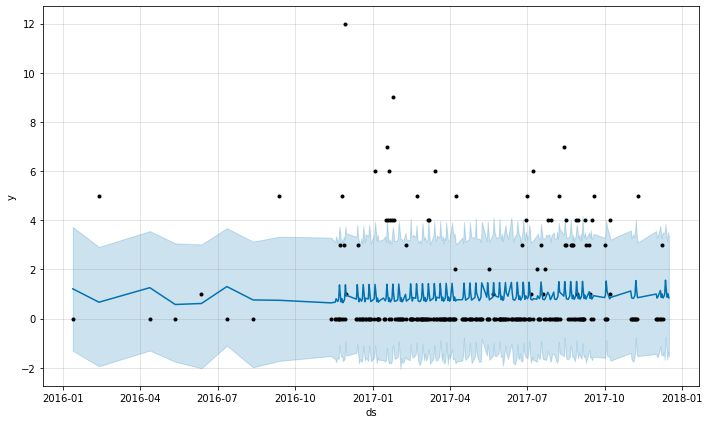

In [1360]:
m1.plot(forecast);

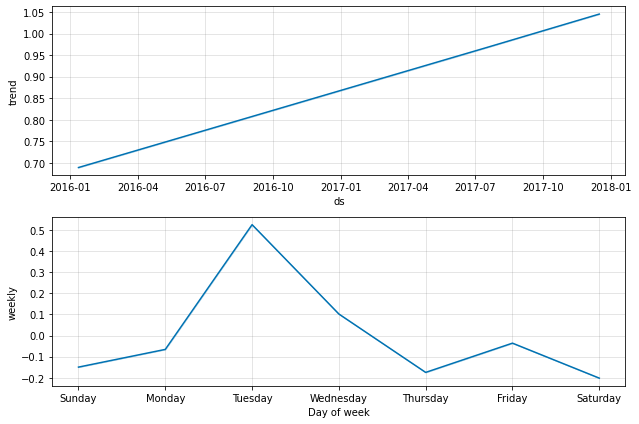

In [1361]:
m1.plot_components(forecast);

In [1362]:
forecast1=forecast[['ds','yhat']].tail(7)

In [1363]:
forecast1.to_csv('pronostico_Aguacate_Papelillo2.csv')

In [1364]:
#Rolling de fb Prophet con serie original
muestra = int(len(Aguacate_Papelillo2 ['y'])*0.94)
train = Aguacate_Papelillo2 [:muestra] 
test = Aguacate_Papelillo2 [(muestra):]
predicciones = np.zeros(len(test))

for i in range(len(test)):
    m = Prophet(weekly_seasonality=False, daily_seasonality=False)
    m.fit(train)
    future = pd.DataFrame(Aguacate_Papelillo2 ['ds'][:(muestra+i+1)])
    forecast = m.predict(future)
    forecast = forecast[['ds', 'yhat']].tail(1)
    print(forecast)
    forecast.columns = ['ds', 'y'] 
    train = train.append(forecast)
    predicciones[i] = forecast[['y']].values
print(predicciones)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
224 2017-11-01  1.04


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
225 2017-11-02  1.29


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
226 2017-11-04  1.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
227 2017-11-05  1.02


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
228 2017-11-06  1.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
229 2017-11-07  1.04


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
230 2017-11-08  1.02


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
231 2017-11-09  1.01


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
232 2017-12-01  1.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
233 2017-12-02  1.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
234 2017-12-03  1.06


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
235 2017-12-06  1.05


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
236 2017-12-07  1.03


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


            ds  yhat
237 2017-12-08  1.11
            ds  yhat
238 2017-12-09  1.03
[1.04317121 1.29449641 1.02801888 1.02007553 1.02522225 1.04143993
 1.024418   1.01466814 1.04884158 1.04698652 1.05557671 1.05438531
 1.03401849 1.11327167 1.02611087]


In [1365]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(test['y'].values, predicciones) ** 0.5
print(RMSE)

1.5062834102801883


# IV.  Conclusiones y Recomendaciones

 - Los dos métodos son buenos para la predicción de los pedidos de los productos, sin embargo el que genera menor error cuadrático medio en las predicciones vs el valor real obtenido son las redes neuronales, en casi todos los casos.
 - De los 121 productos que actualmente distribuye la Star-up, se recomienda enfocarse en los principales productos para garantizar los ingresos de la start-up, ellos son los que generan el 70% de los ingresos de la misma.
 - En estos productos principales se debe garantizar inventario suficiente para cubrir los pronósticos; para ello se recomienda construir un modelo de optimización que permita el abastecimiento para satisfacer la demanda de los 33 clientes.
 - Para los demás productos, se recomienda hacer acuerdos trimestrales con los clientes para garantizar un mínimo pedido por semana, con condiciones que hagan que los clientes asuman los costos de producción en el caso de no satisfacer el mínimo pedido acordado.